# **Part1**: A first glance at the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = "D:\Datasets\YouNiverse"

In [3]:
df_channels = pd.read_csv(data_path + "\df_channels_en.tsv.gz", sep="\t")
df_timeseries = pd.read_csv(data_path + "\df_timeseries_en.tsv.gz", sep="\t")


In [4]:
df_channels

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.0870
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.0870
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.0870
3,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0,2.0870
4,Sports,2007-05-11,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,48400000,43421,11.0,2.0870
...,...,...,...,...,...,...,...,...
136465,Music,2016-10-06,UCuM-9AajUOwKw6ipOzu2DRQ,GONE.Fludd - Topic,10128,105,1008139.0,53.1435
136466,People & Blogs,2013-10-17,UCtW9jp5TH0YrgYpwiRf9t-Q,saidthestory,10100,352,1008644.0,53.1435
136467,Gaming,2015-05-08,UCTsxFTIUs8vFDzGccDm6i7Q,Omni H,10000,475,1009505.0,53.1435
136468,Music,2011-04-13,UC1HOArgRCMGPjlcmkThERwA,TĀLĀ,10000,15,1025119.0,53.1435


In [5]:
df_timeseries

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03 00:00:00,2.024946e+05,0.000000,650.222222,0.000000,5,0,3
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10 00:00:00,3.940857e+05,191591.111111,1046.000000,395.777778,6,1,1
2,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-17 00:00:00,8.353938e+05,441308.083333,1501.500000,455.500000,6,0,1
3,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-24 00:00:00,1.104577e+06,269183.250000,1750.000000,248.500000,6,0,0
4,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-31 00:00:00,1.284406e+06,179828.600000,2008.300000,258.300000,6,0,0
...,...,...,...,...,...,...,...,...,...,...
18872494,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-02 00:00:00,6.012938e+06,232418.277778,61268.611111,1305.611111,278,2,10
18872495,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-09 00:00:00,6.244579e+06,231640.888889,62631.666667,1363.055556,287,9,13
18872496,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-16 00:00:00,6.480902e+06,236322.933333,64010.000000,1378.333333,294,7,16
18872497,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-23 00:00:00,6.745317e+06,264415.200000,65480.000000,1470.000000,301,7,15


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['category_cc']
numerical_features = ['videos_cc', 'weights', 'subscriber_rank_sb']

# One-hot encode the categorical variable 'category_cc'
one_hot_encoder = OneHotEncoder()
category_encoded = one_hot_encoder.fit_transform(df_channels[['category_cc']]).toarray()
category_encoded_df = pd.DataFrame(category_encoded, columns=one_hot_encoder.get_feature_names_out(['category_cc']))

# Include the encoded categorical data with the numerical features
X = pd.concat([df_channels[numerical_features], category_encoded_df], axis=1)
y = df_channels['subscribers_cc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reduce the number of estimators to speed up the process
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)

# If the dataset is too large, use a fraction of it to train the model
if len(X_train) > 100000:  # arbitrary threshold for demonstration purposes
    X_train_sample = X_train.sample(n=100000, random_state=42)
    y_train_sample = y_train.loc[X_train_sample.index]
else:
    X_train_sample = X_train
    y_train_sample = y_train

# Train the model on the smaller sample set
rf_model.fit(X_train_sample, y_train_sample)

# Predict the number of subscribers on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(82810601341.35266, 0.9411359554265518)

C:\Users\15712\AppData\Local\Temp\ipykernel_3868\2075055731.py:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_channels.corr()


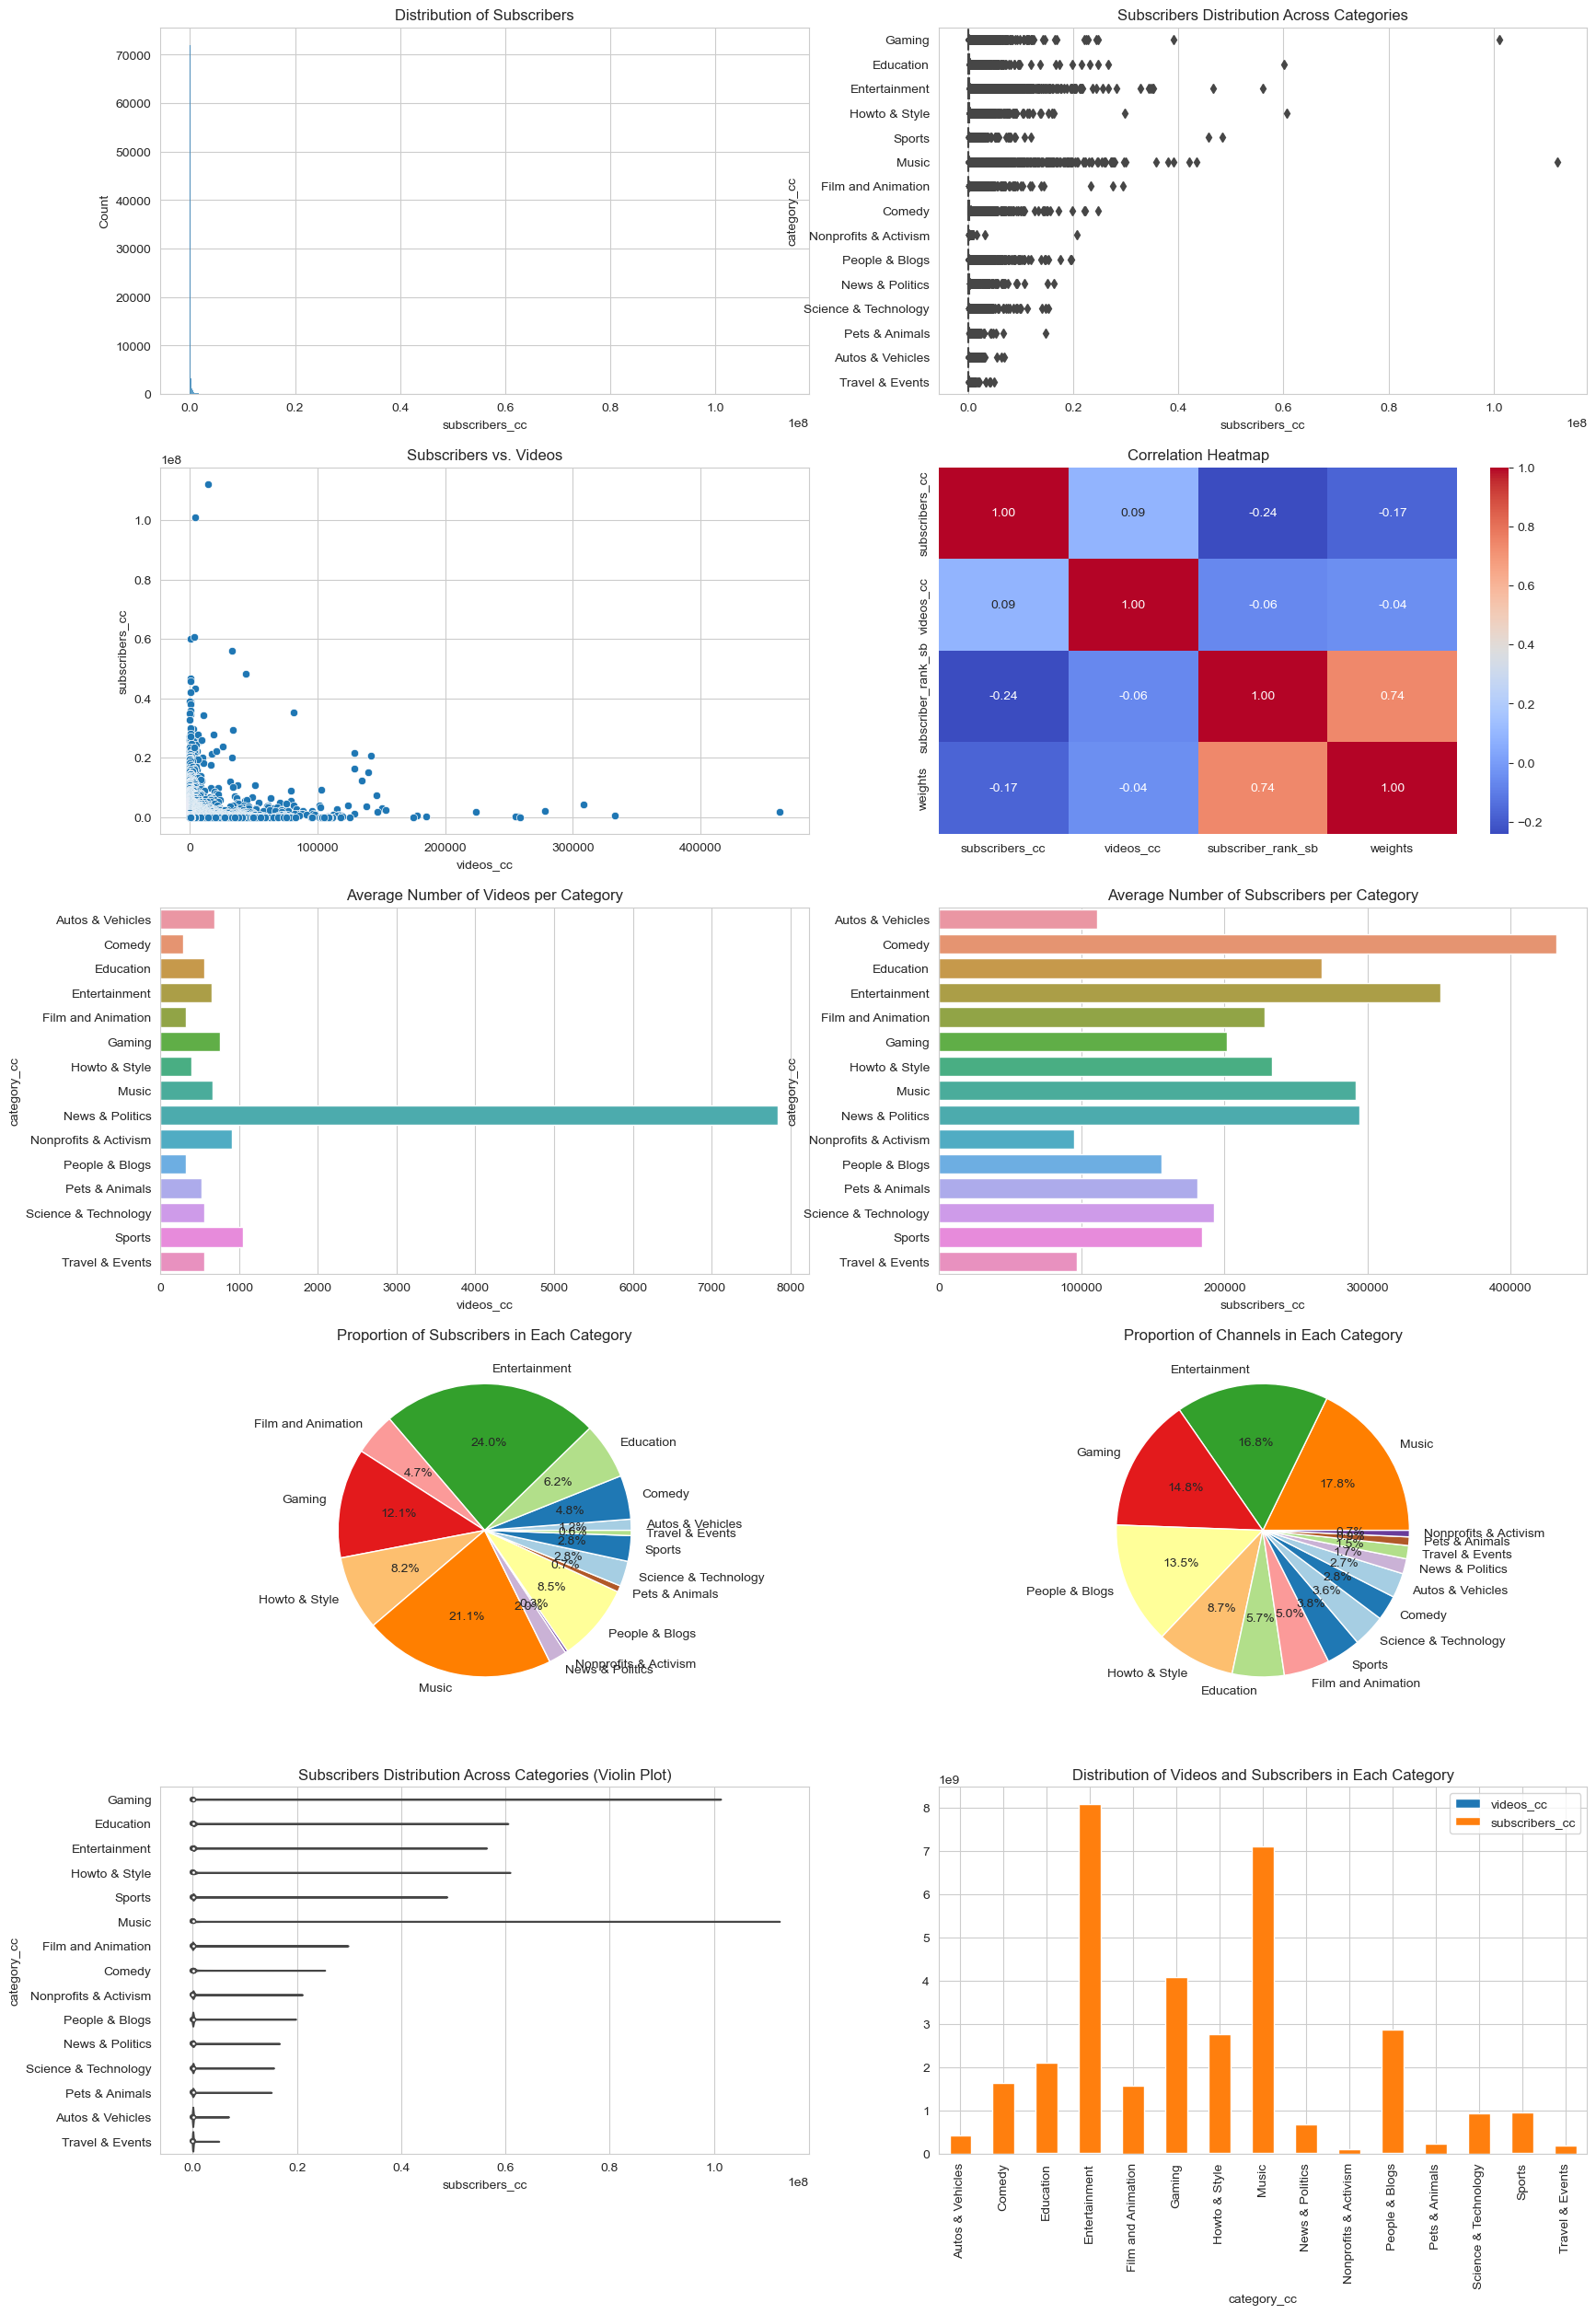

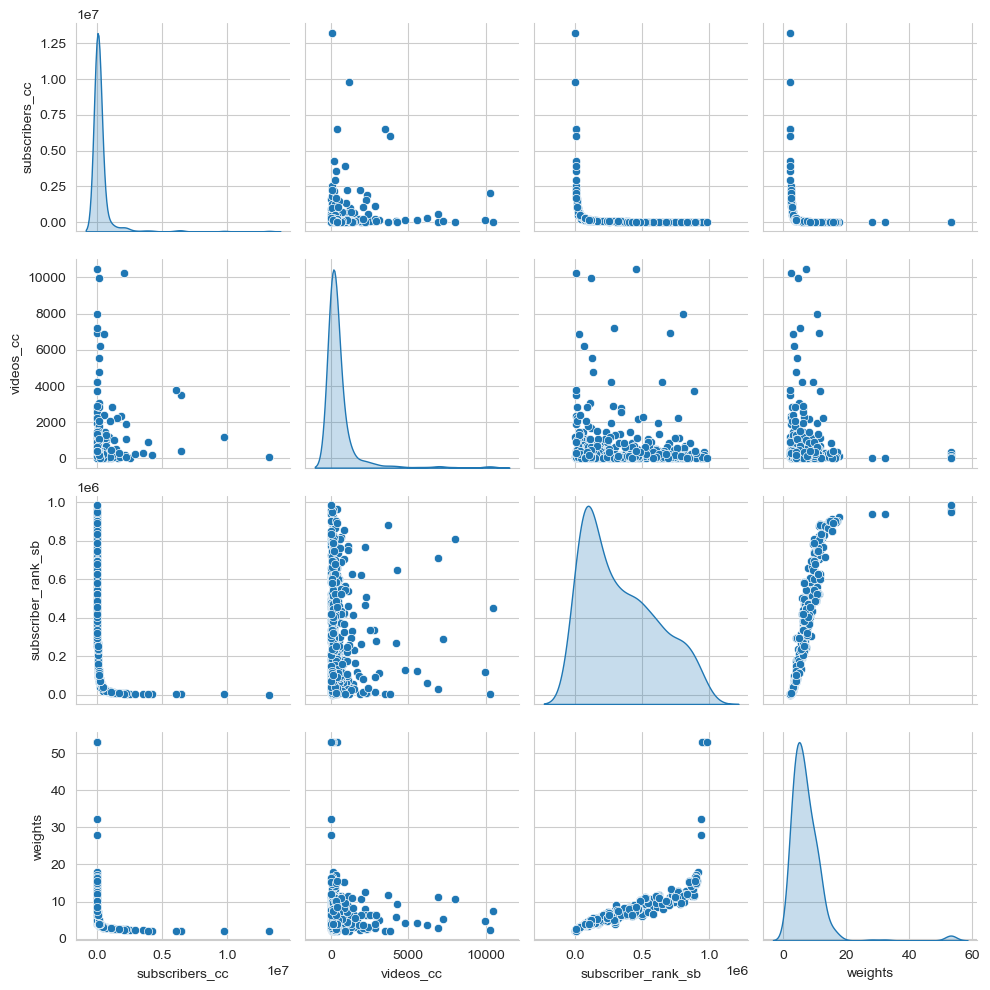

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Define the figure for the subplot
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 30))

# Histogram of subscribers
sns.histplot(df_channels['subscribers_cc'], bins=3000, kde=False, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Subscribers')

# Boxplot of subscribers across different categories
sns.boxplot(x='subscribers_cc', y='category_cc', data=df_channels, ax=axes[0, 1])
axes[0, 1].set_title('Subscribers Distribution Across Categories')

# Scatter plot of subscribers vs. videos
sns.scatterplot(x='videos_cc', y='subscribers_cc', data=df_channels, ax=axes[1, 0])
axes[1, 0].set_title('Subscribers vs. Videos')

# Correlation heatmap
corr = df_channels.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Correlation Heatmap')

# Pairplot for numerical features (sampled due to large size)
sns.pairplot(df_channels.sample(min(500, len(df_channels)), random_state=42), diag_kind='kde')

# Average number of videos and subscribers in each category
category_stats = df_channels.groupby('category_cc').agg({'videos_cc':'mean', 'subscribers_cc':'mean'}).reset_index()
sns.barplot(x='videos_cc', y='category_cc', data=category_stats, ax=axes[2, 0])
axes[2, 0].set_title('Average Number of Videos per Category')

sns.barplot(x='subscribers_cc', y='category_cc', data=category_stats, ax=axes[2, 1])
axes[2, 1].set_title('Average Number of Subscribers per Category')



# The following codes ensure that the same color is used for the same category across all plots
# Filter out NaN values and ensure that all entries are strings
filtered_categories = df_channels['category_cc'].dropna().astype(str)

# Create a sorted list of unique categories
unique_categories = sorted(filtered_categories.unique())

# Create a color palette with a distinct color for each category
colors = sns.color_palette('Paired', len(unique_categories))

# Create a color map (dictionary) for each category
color_map = {category: color for category, color in zip(unique_categories, colors)}



# Pie chart for proportion of subscribers in each category
category_subscribers = df_channels.groupby('category_cc')['subscribers_cc'].sum()
axes[3, 0].pie(category_subscribers, labels=category_subscribers.index, autopct='%1.1f%%', colors=[color_map[cat] for cat in category_subscribers.index])
axes[3, 0].set_title('Proportion of Subscribers in Each Category')

# Pie chart for proportion of channels in each category
category_counts = df_channels['category_cc'].value_counts()
axes[3, 1].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=[color_map[cat] for cat in category_counts.index])
axes[3, 1].set_title('Proportion of Channels in Each Category')

# Violin plot for subscribers across different categories
sns.violinplot(x='subscribers_cc', y='category_cc', data=df_channels, ax=axes[4, 0])
axes[4, 0].set_title('Subscribers Distribution Across Categories (Violin Plot)')

# Stacked bar chart for distribution of videos and subscribers in each category
category_grouped = df_channels.groupby('category_cc').agg({'videos_cc':'sum', 'subscribers_cc':'sum'})
category_grouped.plot(kind='bar', stacked=True, ax=axes[4, 1])
axes[4, 1].set_title('Distribution of Videos and Subscribers in Each Category')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


At first glance, it seems that `subscribers` vs `videos` graph follows a power law distribution. Let's check it out.

In [12]:
from sklearn.linear_model import LinearRegression

# Determine the 95th percentile of subscribers
percentile_95 = np.percentile(df_channels['subscribers_cc'], 95)

# Filter the dataset for channels that have subscriber counts above the 95th percentile
upper_bound_data = df_channels[df_channels['subscribers_cc'] >= percentile_95]

# Log-transform the upper bound data
log_subscribers_upper = np.log(upper_bound_data['subscribers_cc'] + 1)
log_videos_upper = np.log(upper_bound_data['videos_cc'] + 1)

# Reshape the data for sklearn
X_upper = log_videos_upper.values.reshape(-1, 1)
y_upper = log_subscribers_upper.values.reshape(-1, 1)

# Create and fit the model for the upper bound data
model_upper = LinearRegression()
model_upper.fit(X_upper, y_upper)

# Get the coefficient (k) and the intercept (log(a)) for the upper bound model
k_upper = model_upper.coef_[0][0]
log_a_upper = model_upper.intercept_[0]

# Calculate the R-squared value to assess the fit for the upper bound model
r_squared_upper = model_upper.score(X_upper, y_upper)

# Convert log(a) back to a for the upper bound model
a_upper = np.exp(log_a_upper)

# Return the model parameters and R-squared value for the upper bound
a_upper, k_upper, r_squared_upper, percentile_95

(1438047.5599822202,
 0.061682834382706615,
 0.01912954313949633,
 909759.6499999992)

- The exponent $k$ for the upper bound is approximately 0.0617.

The $R^2$ value for the upper bound model is approximately 0.0191, which is even lower than the model for the entire dataset. This lower $R^2$ value indicates that the power-law model explains an even smaller portion of the variance within the upper bound of the data.

Or, if we want to visualize the data in a log-log plot, we can see that the data points are not linearly distributed. 
![log-logGraph](\plots\graph1.png)

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_timeseries is your time-series data with columns as specified
# Scaling the 'subs' column from df_timeseries
scaler = MinMaxScaler(feature_range=(-1, 1))
df_timeseries['scaled_subs'] = scaler.fit_transform(df_timeseries['subs'].values.reshape(-1,1))

# We create sequences of data for the LSTM
def create_sequences(input_data, time_steps):
    inout_seq = []
    L = len(input_data)
    for i in range(L - time_steps):
        train_seq = input_data[i:i + time_steps]
        train_label = input_data[i + time_steps:i + time_steps + 1]
        inout_seq.append((train_seq, train_label))
    return inout_seq

time_steps = 5  # For example, using 5 days of data to predict the 6th day
df_timeseries_sorted = df_timeseries.sort_values(by=['channel', 'datetime'])
sequences = df_timeseries_sorted.groupby('channel')['scaled_subs'].apply(lambda x: create_sequences(x.tolist(), time_steps))
sequences = [item for sublist in sequences for item in sublist]  # Flatten the list

# Splitting the data into features and targets
X, y = zip(*sequences)
X = np.array(X).reshape(-1, time_steps, 1)
y = np.array(y).reshape(-1, 1)

# Convert the data to PyTorch tensors
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y)

# Create the DataLoader
dataset = TensorDataset(X_tensor, y_tensor)
train_loader = DataLoader(dataset, batch_size=64, shuffle=False)

# LSTM Model
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size, batch_first=True)
        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, input_seq):
        lstm_out, _ = self.lstm(input_seq)
        predictions = self.linear(lstm_out[:, -1, :])  # Take the last time step only
        return predictions

# Instantiate the model, define the loss function and the optimizer
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 5
loss_history = []
for epoch in range(epochs):
    model.train()
    for i, (seq, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        y_pred = model(seq)
        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()
        loss_history.append(single_loss.item())
    
    print(f'Epoch {epoch+1}/{epochs}, Loss: {single_loss.item():.4f}')

    # Optionally, add code to evaluate the model on a validation set here

# Visualize the training progress
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Training loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Data exploration

> Before diving in the huge comments dataset containing more than 1 billions comments we will go through the 2 large dataset containing information about number of comments per author and number of comments per videos 

In [3]:
# Load the 2 datasets
num_comments = pd.read_csv("data/num_comments.tsv", sep="\t")
num_comments_authors = pd.read_csv("data/num_comments_authors.tsv", sep="\t")

### 1. Video comments dataset

In [4]:
num_comments.head()

,display_id,num_comms
0,SBqSc91Hn9g,0.0
1,UuugEl86ESY,0.0
2,oB4c-yvnbjs,48.0
3,ZaV-gTCMV8E,6.0
4,cGvL7AvMfM0,5.0


In [5]:
num_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72924794 entries, 0 to 72924793
Data columns (total 2 columns):
 #   Column      Dtype  
---  ------      -----  
 0   display_id  object 
 1   num_comms   float64
dtypes: float64(1), object(1)
memory usage: 1.1+ GB


In [6]:
num_comments.describe()

,num_comms
count,7.292479e+07
mean,1.217165e+02
std,1.343391e+03
min,0.000000e+00
25%,0.000000e+00
50%,5.000000e+00
75%,3.900000e+01
max,1.125155e+06


> First we note that we have indeed a large dataset with more than 72 millions entries corresponding to the 72,924,794 videos created between 2005-05-24 to 2019-11-20. We may add additionnal this comments information later to the video metadat to enhance our analysis. But for the moment we can spot that these numms of comments are distributed following a heavy taile distribution as most of the mass is contains between 0 comments and 39 comments, pretty low in comparison to the max value of 1.125155e+06.

-  Lets visualy look at this distribution using the ccdf on log scale of our data. 

In [7]:
sample_df = num_comments.sample(int(2e+06))

/var/folders/gx/b0gl84xd4rjflbpgs2bhddcc0000gp/T/ipykernel_58868/2609893468.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(num_comments.num_comms + 1), kde=False,


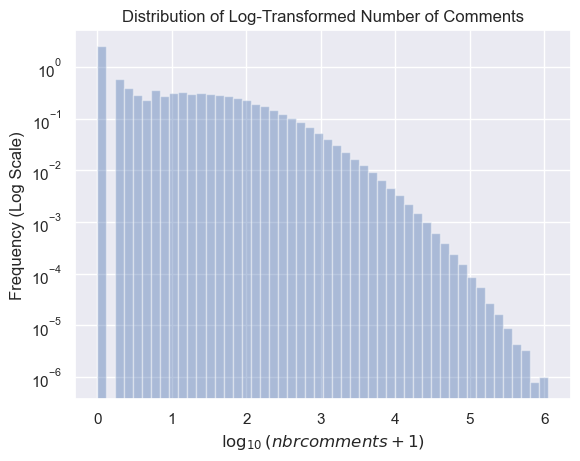

In [8]:
# Simple log log hist plot
kwargs = {'cumulative': False}
sns.distplot(np.log10(num_comments.num_comms + 1), kde=False, 
             kde_kws=kwargs, norm_hist=True)
plt.title("Distribution of Log-Transformed Number of Comments")
plt.xlabel(r'$\log_{10}(nbrcomments + 1)$')
plt.ylabel("Frequency (Log Scale)")
plt.yscale('log')
plt.show()

> Looking at the distribution of the comments per videos we can observe that the vast majority of the videos only get a small amount of comments. This is intuitive as the majority of the Youtube video are coming from small channels that generate a small amount of views flow and then a small amount of comments. Note that as the goal of our study is to focus on large communities arount precise topics we will drop these small channels and by implication these videos with small amount of comments. For the moment we are assuming that:
$\textit{Large subscriber channels implies famous videos implies lots of comments.}$

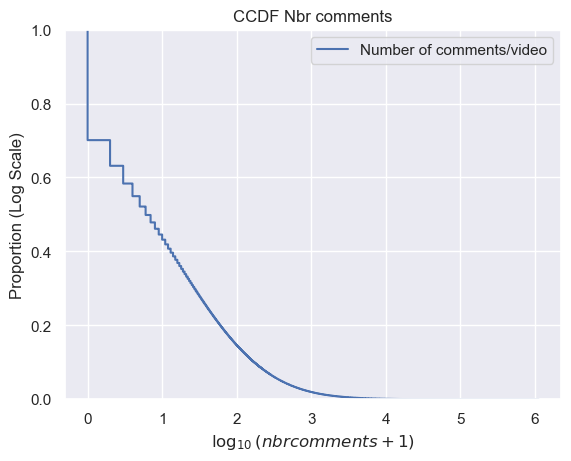

In [9]:
# Visual analysis using seaborn ccdf function
sns.ecdfplot(np.log10(num_comments.num_comms + 1), label="Number of comments/video", complementary=True)
plt.legend()
plt.xlabel(r'$\log_{10}(nbrcomments + 1)$')
plt.ylabel("Proportion (Log Scale)")
plt.title("CCDF Nbr comments")
plt.show()

- Add a ccdf plot but as the distribution is crushed by the large amount of small values this plot is intuitive.

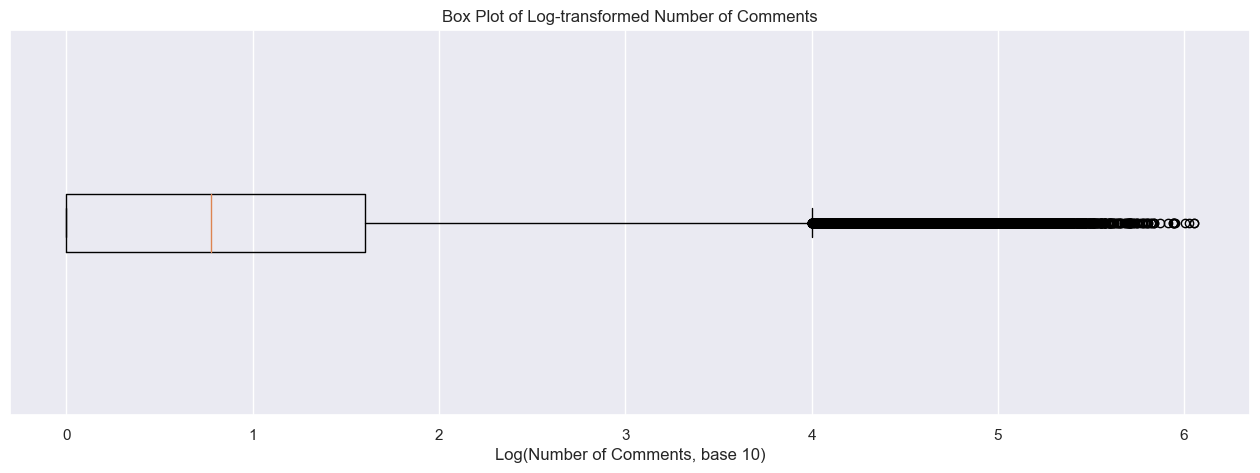

In [23]:
# Visual invistigation of the outliers
fig, ax = plt.subplots(figsize=(16, 5))

# Create the box plot with data transformation and hiding outliers
ax.boxplot(np.log10(num_comments.num_comms + 1), showfliers=True, vert=False)

# Customize the plot
ax.set_yticks([])
ax.set_xlabel("Log(Number of Comments, base 10)")
ax.set_title("Box Plot of Log-transformed Number of Comments")

# Show the plot
plt.show()

- Lets see the number of videos with number of comments above $10^4$

In [24]:
num_videos_with_more_than_10k_comments = len(num_comments[num_comments['num_comms'] > 1e4])

print(f"Number of videos with more than 10,000 comments: {num_videos_with_more_than_10k_comments}")

Number of videos with more than 10,000 comments: 83304


> Which result in at least 800 millions comments in total but not enough videos and we could inspect their categories but they certainly come from all the same category => music(e.g Luis Fonsi - Despacito ft. Daddy Yankee got 4millions comments).

In [26]:
num_videos_with_more_than_30_comments = len(num_comments[num_comments['num_comms'] > 30])

print(f"Number of videos with more than 30 comments: {num_videos_with_more_than_30_comments}")

Number of videos with more than 30 comments: 15940203


> Like in the paper and after further invistigation on youtube comments section we approve the fact that keeping the videos with at least 30 comments is a good threshold as a videos with 50 comments may produce 50k views which is good. 

> A good research would be to look how the categories the views and num of comments are related.

### 2. Authors comments dataset

In [27]:
num_comments_authors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448810483 entries, 0 to 448810482
Data columns (total 2 columns):
 #   Column    Dtype
---  ------    -----
 0   author    int64
 1   video_id  int64
dtypes: int64(2)
memory usage: 6.7 GB


> video_id to refer as the numer of comments doesn't have much sense lets replace it simply by "number_comm"

In [12]:
num_comments_authors.describe()

,author,video_id
count,4.488105e+08,4.488105e+08
mean,2.882777e+08,1.917428e+01
std,1.664337e+08,1.406534e+02
min,1.000000e+00,1.000000e+00
25%,1.441397e+08,1.000000e+00
50%,2.882794e+08,2.000000e+00
75%,4.324085e+08,8.000000e+00
max,5.765520e+08,3.520200e+05


In [2]:
sorted_df = pd.read_parquet('data/num_comments_authors_sorted.parquet')

In [3]:
sorted_df = sorted_df.rename(columns={'video_id': 'number_comm'})

In [4]:
sorted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448810483 entries, 0 to 448810482
Data columns (total 2 columns):
 #   Column       Dtype
---  ------       -----
 0   author       int64
 1   number_comm  int64
dtypes: int64(2)
memory usage: 6.7 GB


In [38]:
sorted_df.head()

,author,number_comm
0,157898414,352020
1,309188934,285379
2,133567048,255775
3,472447001,202561
4,224828975,193858


> Like we did previously lets look at the distribution of the data

/var/folders/gx/b0gl84xd4rjflbpgs2bhddcc0000gp/T/ipykernel_85559/2885305410.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(sorted_df.number_comm + 1), kde=False,


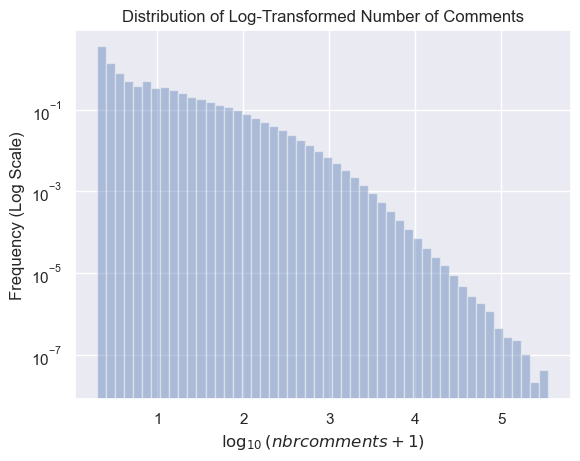

In [5]:
# Simple log log hist plot
kwargs = {'cumulative': False}
sns.distplot(np.log10(sorted_df.number_comm + 1), kde=False, 
             kde_kws=kwargs, norm_hist=True)
plt.title("Distribution of Log-Transformed Number of Comments")
plt.xlabel(r'$\log_{10}(nbrcomments + 1)$')
plt.ylabel("Frequency (Log Scale)")
plt.yscale('log')
plt.show()

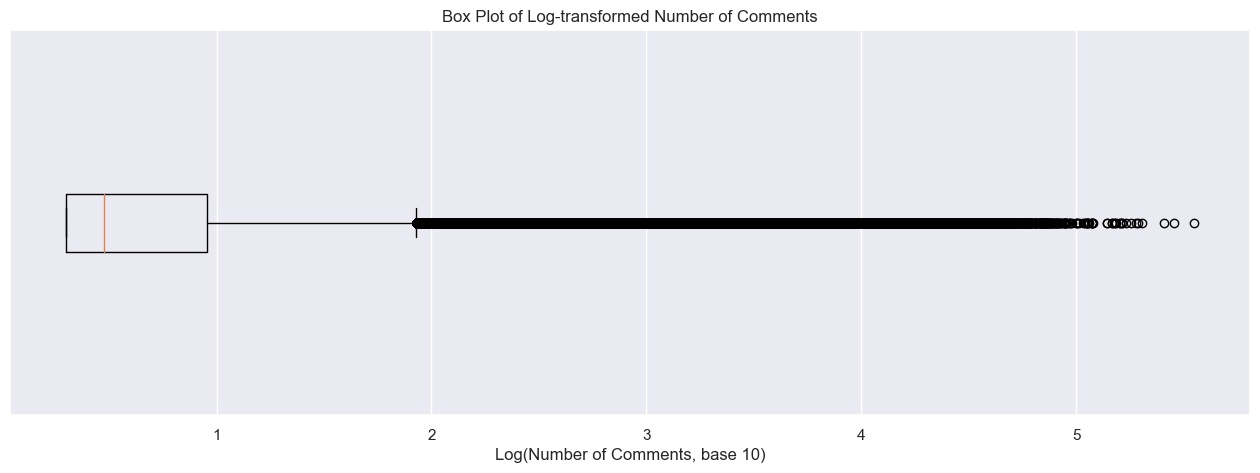

In [6]:
# Visual invistigation of the outliers
fig, ax = plt.subplots(figsize=(16, 5))

# Create the box plot with data transformation and hiding outliers
box = ax.boxplot(np.log10(sorted_df.number_comm + 1), showfliers=True, vert=False)

# Customize the plot
ax.set_yticks([])
ax.set_xlabel("Log(Number of Comments, base 10)")
ax.set_title("Box Plot of Log-transformed Number of Comments")

# Show the plot
plt.show()

> Here the analysis of the outliers is more interesting. First we can observe that some small group of authors are out on high values (note that in our case as we are using a log scale a small space between points represent a big gap). Moreover the boundary of the flyers on the box plot is lower than what we had with the video. Lets count the number of authors that are represented as flyers, there number of comments (descibe())

In [29]:
# Extract the fliers
fliers = [10**f.get_xdata() for f in box['fliers']][0]
heavy_authors = pd.DataFrame({'num_comms': fliers})

In [30]:
heavy_authors.describe()

,num_comms
count,1.829860e+07
mean,2.988613e+02
std,6.327638e+02
min,8.600000e+01
25%,1.130000e+02
50%,1.640000e+02
75%,2.910000e+02
max,3.520210e+05


In [31]:
heavy_authors.num_comms.sum()

5468744612.0

In [40]:
top_1million = heavy_authors.head(1000000)

In [41]:
top_1million.num_comms.sum()

1763726159.0

> We are still with a large amount of comments more than 5billions.

In [32]:
heavy_authors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18298605 entries, 0 to 18298604
Data columns (total 1 columns):
 #   Column     Dtype  
---  ------     -----  
 0   num_comms  float64
dtypes: float64(1)
memory usage: 139.6 MB


In [33]:
len(heavy_authors)

18298605

In [34]:
top_commenters = sorted_df.head(len(heavy_authors))
top_commenters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18298605 entries, 0 to 18298604
Data columns (total 2 columns):
 #   Column       Dtype
---  ------       -----
 0   author       int64
 1   number_comm  int64
dtypes: int64(2)
memory usage: 279.2 MB


In [37]:
# save the top commenters
top_commenters.to_parquet(path='data/top_commenters.parquet')

> The outliers correspond to 18millions authors which is small in comparison to the 449millions (4% of all the authors), but for our analysis as we want to analyse communities it makes sense to restrict our self to these 18millions users that are the one that comments more so tend to be more active in a communities than authors that just comments once.

/var/folders/gx/b0gl84xd4rjflbpgs2bhddcc0000gp/T/ipykernel_59640/1761025676.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(heavy_authors.num_comms + 1), kde=False,


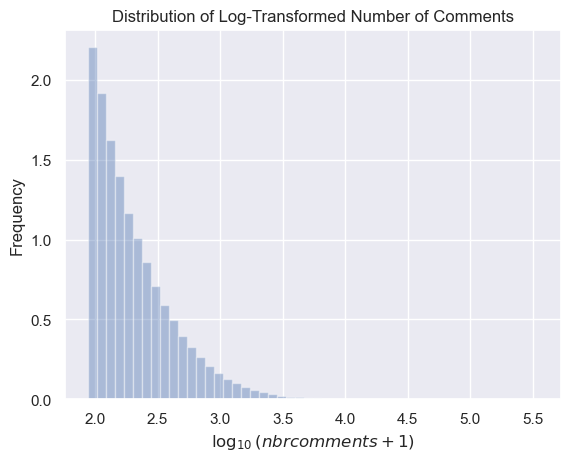

In [24]:
# Simple log log hist plot
kwargs = {'cumulative': False}
sns.distplot(np.log10(heavy_authors.num_comms + 1), kde=False, 
             kde_kws=kwargs, norm_hist=True)
plt.title("Distribution of Log-Transformed Number of Comments")
plt.xlabel(r'$\log_{10}(nbrcomments + 1)$')
plt.ylabel("Frequency")
# plt.y/scale('log')
plt.show()

> Continuation of the research: take the general comments_df, filter only the 18 millions authors highlighted previously, invistigate users with extreme nbr of comment (more than 10k) to keep only real user and avoir possible bots comments, then build using yt_metadata a df that combine these authors with the videos they commented on, but before we have to reduce the number of comments we have either by filtering the videos that we will use and drop all related comments or reduce the size of authors.

# Extract Comments


In [14]:
import gzip
import pandas as pd
import feather
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

In [8]:
COMMENTS = 'DATA/youtube_comments.tsv.gz'
HELPERMD = 'data/yt_metadata_helper.feather'
METADATA = 'data/yt_metadata_en.jsonl.gz'
MERGEDHELPERCOMM = 'data/mergedmetadatacomments.csv'
MERGEDTAGSCOMM = 'finalgamingtagcomment.parquet'
METADATAFILTERED = 'allmtdt.parquet'

COMMENTS is 77GB, we do not have the processing capacity to extract all the data, we are planning on ways to extract it for the next milestone but to make the first analysis, we decided to sample it by taking the first 100M comments (7B comments in the file). The data is sorted by author ID so authors are grouped. 

This observation helps us in our analysis by knowing that we eon't have missing data per author treated.

In [5]:

commentstoextract = 100000000

# Utilisez gzip pour décompresser le fichier
with gzip.open(COMMENTS, 'rt', encoding='utf-8') as f:
    # Utilisez pandas pour charger le fichier TSV dans un DataFrame
    df_comm = pd.read_csv(f, sep='\t', nrows=commentstoextract
                        )

# Affichez les premières lignes du DataFrame pour vérifier
df_comm.drop(columns=['likes','replies'])
df_comm.head()

,author,video_id,likes,replies
0,1,Gkb1QMHrGvA,2,0
1,1,CNtp0xqoods,0,0
2,1,249EEzQmVmQ,1,0
3,1,_U443T2K_Bs,0,0
4,1,rJbjhm0weYc,0,0


# Extract Helper YT_Metadata


In [4]:
df_helper = feather.read_dataframe(HELPERMD)

In [5]:
df_helper.head()

,categories,channel_id,dislike_count,display_id,duration,like_count,upload_date,view_count
0,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,1.0,SBqSc91Hn9g,1159,8.0,2016-09-28,1057.0
1,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,1.0,UuugEl86ESY,2681,23.0,2016-09-28,12894.0
2,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,779.0,oB4c-yvnbjs,1394,1607.0,2016-09-28,1800602.0
3,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,24.0,ZaV-gTCMV8E,5064,227.0,2016-09-28,57640.0
4,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,13.0,cGvL7AvMfM0,3554,105.0,2016-09-28,86368.0


***YT_Metadata Analysis***

Let's plot the number of videos per category, and the uploads per category through time 

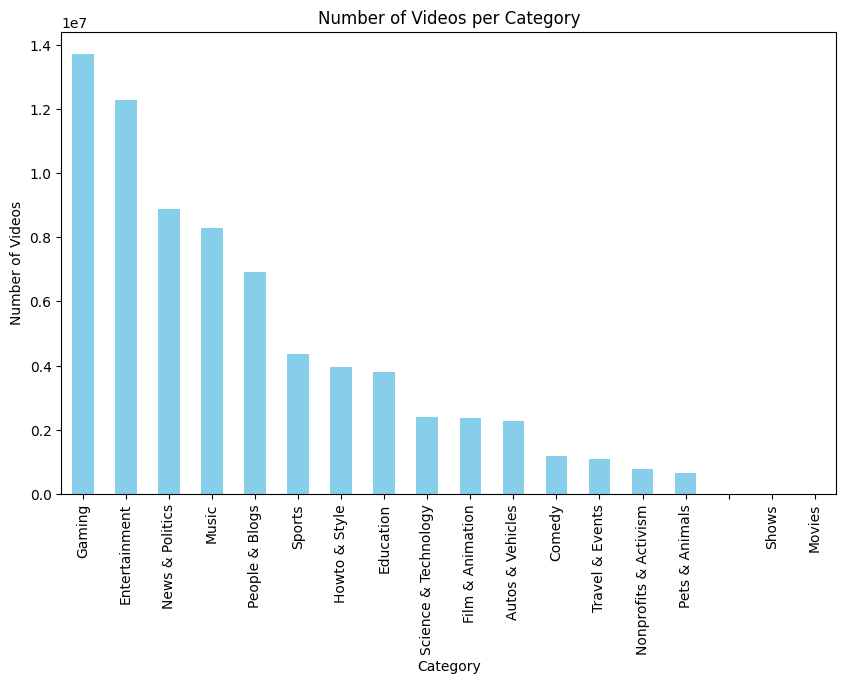

In [6]:

# Plot the number of videos per category
videos_per_category = df_helper['categories'].value_counts()
videos_per_category.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Number of Videos per Category')
plt.xlabel('Category')
plt.ylabel('Number of Videos')
plt.show()


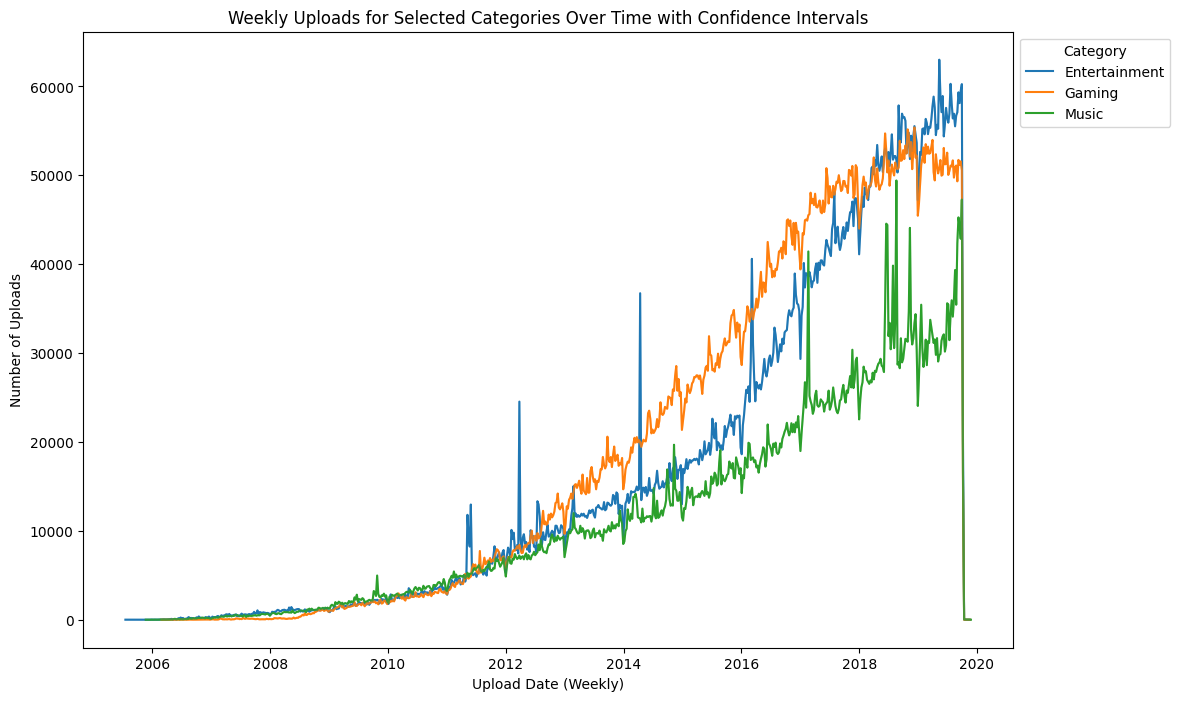

In [8]:

# Plot the uploads per category through time

# Convert the 'upload_date' column to datetime format
df_helper['upload_date'] = pd.to_datetime(df_helper['upload_date'])
# Filter the DataFrame for the selected categories
selected_categories = ['Gaming', 'Entertainment', 'Music']
selected_df = df_helper[df_helper['categories'].isin(selected_categories)]

# Resample the data to get weekly counts
weekly_uploads = selected_df.groupby(['categories', pd.Grouper(key='upload_date', freq='W-Mon')])['display_id'].count().reset_index()

# Plot the weekly uploads for selected categories with confidence intervals
plt.figure(figsize=(12, 8))
sns.lineplot(data=weekly_uploads, x='upload_date', y='display_id', hue='categories')

# Add confidence intervals
sns.lineplot(data=weekly_uploads, x='upload_date', y='display_id', hue='categories', errorbar='sd', legend=False, alpha=0.2)

plt.title('Weekly Uploads for Selected Categories Over Time with Confidence Intervals')
plt.xlabel('Upload Date (Weekly)')
plt.ylabel('Number of Uploads')
plt.legend(title='Category', bbox_to_anchor=(1, 1))
plt.show()

As gaming category has the most comments, we can see that at the end of the crawling, entertainment content passed it. We can see that for example, Big Youtubeurs like PewDiePie did also the same transition from gaming to entertainment, thiws phenomenon is maybe explained by the fact that people are getting older and less interested in gaming, so channels will have to convert in order to maintain their audience. 

But in general categories ar growing in the same way and reflect the general popularity of youtube, which has grown enormously over this period.

# Merging YT_Metadata and Comments 

In [ ]:

df_comm = df_comm.rename(columns={'video_id': 'display_id'})
df_merged = pd.merge(df_comm, df_helper, on='display_id', how='left')
df_merged.head()

In [9]:
df_merged.to_csv(MERGEDHELPERCOMM, index=False)


In [18]:
df_merged = pd.read_csv(MERGEDHELPERCOMM)


In [4]:
df_merged.head()

,author,display_id,likes,replies,categories,channel_id,dislike_count,duration,like_count,upload_date,view_count
0,1,Gkb1QMHrGvA,2,0,People & Blogs,UCBXNpF6k2n8dsI6nBH8q4sQ,7708.0,478,85133.0,2019-06-01,11659189.0
1,1,CNtp0xqoods,0,0,Entertainment,UCpB959t8iPrxQWj7G6n0ctQ,1859.0,815,111451.0,2019-04-06,3807677.0
2,1,249EEzQmVmQ,1,0,Entertainment,UCpB959t8iPrxQWj7G6n0ctQ,1643.0,697,84571.0,2019-09-15,2679538.0
3,1,_U443T2K_Bs,0,0,Comedy,UCM2ERkgV3P1_6MAyxa51rxA,3287.0,990,41195.0,2019-08-03,1235364.0
4,1,rJbjhm0weYc,0,0,People & Blogs,UCtwD0AlYSlAYv7eXu8UxtEg,1740.0,603,18827.0,2019-09-11,914335.0


Let's keep only interesting columns for our research 

In [19]:
df_mergednew = df_merged.loc[:, ['display_id', 'author', 'replies','likes','categories']]
df_mergednew.head()


,display_id,author,replies,likes,categories
0,Gkb1QMHrGvA,1,0,2,People & Blogs
1,CNtp0xqoods,1,0,0,Entertainment
2,249EEzQmVmQ,1,0,1,Entertainment
3,_U443T2K_Bs,1,0,0,Comedy
4,rJbjhm0weYc,1,0,0,People & Blogs


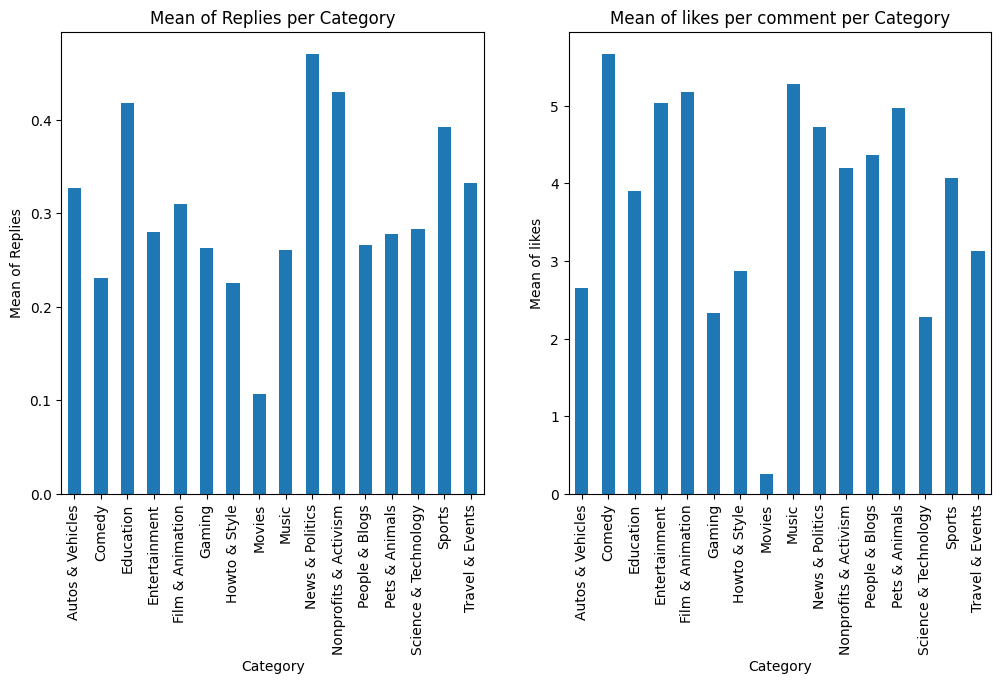

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

df_replies_per_video = df_mergednew.groupby(['categories'])['replies'].mean()
df_replies_per_video.plot(kind='bar', ax=ax1)
ax1.set_title('Mean of Replies per Category')
ax1.set_xlabel('Category')
ax1.set_ylabel('Mean of Replies')

df_likes_per_video = df_mergednew.groupby(['categories'])['likes'].mean()
df_likes_per_video.plot(kind='bar', ax=ax2)
ax2.set_title('Mean of likes per comment per Category')
ax2.set_xlabel('Category')
ax2.set_ylabel('Mean of likes')

plt.show()


In [20]:
df_author_categories = df_mergednew.groupby(['author', 'categories']).size().reset_index(name='count')
df_author_categories.head()
df_author_categories['count_sum'] = df_author_categories.groupby('author')['count'].transform('sum')
df_author_categories['count_ratio'] = df_author_categories['count'] / df_author_categories['count_sum']
df_author_categories.head()

df_author_categories = df_author_categories.drop(columns=[ 'count_sum'])
df_author_categories.head()

,author,categories,count,count_ratio
0,1,Comedy,1,0.200000
1,1,Entertainment,2,0.400000
2,1,People & Blogs,2,0.400000
3,2,Gaming,2,0.666667
4,2,Howto & Style,1,0.333333


In [15]:
categories_to_keep = ['Gaming', 'Music', 'News & Politics', 'Science & Technology', 'Sports','Howto & Style']
df_author_categories_filtered = df_author_categories[df_author_categories['categories'].isin(categories_to_keep)]
df_author_categories_filtered.head()

,author,categories,count,count_ratio
3,2,Gaming,2,0.666667
4,2,Howto & Style,1,0.333333
8,4,News & Politics,1,0.166667
9,4,Science & Technology,1,0.166667
10,5,Gaming,2,0.666667


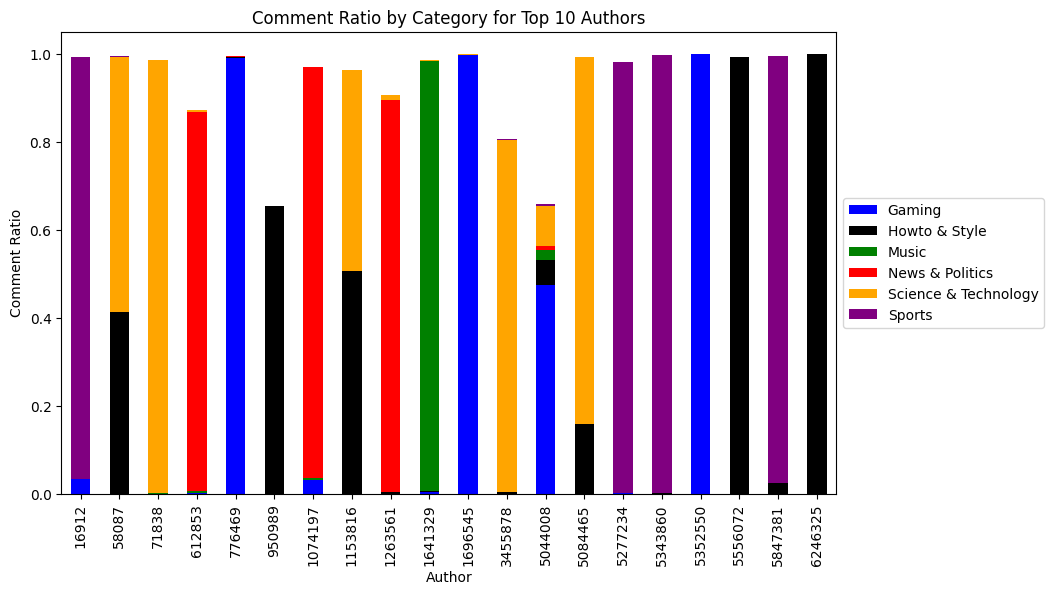

In [16]:

# Define colors for each category
colors = {'Gaming': 'blue', 'Music': 'green', 'News & Politics': 'red', 'Science & Technology': 'orange', 'Sports': 'purple','Howto & Style':'black'}
# pick top 10 authors by comment count
top_authors = df_author_categories_filtered.groupby('author')['count'].sum().sort_values(ascending=False).head(20).index.tolist()

# filter the dataframe to only include the top 10 authors
df_top_authors = df_author_categories_filtered[df_author_categories_filtered['author'].isin(top_authors)]

# create a pivot table to prepare data for stacked plot
df_pivot = df_top_authors.pivot(index='author', columns='categories', values='count_ratio')

# plot the stacked plot
fig, ax = plt.subplots(figsize=(10, 6))
df_pivot.plot(kind='bar', stacked=True, ax=ax, color=[colors[c] for c in df_pivot.columns])

plt.title('Comment Ratio by Category for Top 10 Authors')
plt.xlabel('Author')
plt.ylabel('Comment Ratio')

# move the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()


In [17]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


df = df_author_categories_filtered

# Create a graph
G = nx.Graph()

# Add nodes and edges to the graph
for _, row in df.iterrows():
    G.add_node(row['categories'])
    G.nodes[row['categories']]['count'] = row['count']
    G.nodes[row['categories']]['count_ratio'] = row['count_ratio']

# Add edges based on common authors
for _, group in df.groupby('author'):
    categories = group['categories'].tolist()
    for i in range(len(categories)):
        for j in range(i + 1, len(categories)):
            if G.has_edge(categories[i], categories[j]):
                G[categories[i]][categories[j]]['weight'] += 1
            else:
                G.add_edge(categories[i], categories[j], weight=1)

# Draw the graph
pos = nx.spring_layout(G, k=2)  # You can adjust the k parameter to increase or decrease the distance between nodes
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='lightblue')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the plot
plt.show()


# Extract YT_Metadata

In [ ]:
# Replace 'your_file.jsonl.gz' with the actual file path
file_path = METADATA

for i in range(8):
    # Specify the number of chunks to skip
    chunks_to_skip = i*1000
    chunk_size = 10000
    counter = 0
    # Create a list to store DataFrames
    chunks = []

    with gzip.open(file_path, 'rt', encoding='utf-8') as file:
        for _ in tqdm(islice(file, chunks_to_skip * chunk_size)):
            pass

        # Read the remaining data in chunks
        for chunk_df in tqdm(pd.read_json(file, lines=True, chunksize=chunk_size)):
            counter += 1
            if counter > 1000:
                break
            # Keep only rows with categories equal to gaming
            chunk_df = chunk_df[chunk_df['categories'] == 'Gaming']
            chunk_df = chunk_df.drop(columns=['description','title','view_count','dislike_count','channel_id','like_count','crawl_date','duration'])

            chunks.append(chunk_df)

    # Concatenate all chunks into a single DataFrame
    df = pd.concat(chunks, ignore_index=True)
    # Specify the path where you want to save the Parquet file
    parquet_file_path = f'output_file{i}.parquet'
    # Save the DataFrame to a Parquet file
    df.to_parquet(parquet_file_path, index=False)
    # Display the DataFrame
    print(f"Parquet file {i} saved successfully!")
    del df


In [ ]:


dfs = pd.DataFrame()

for i in tqdm(range(8)):
    file= f'output_file{i}.parquet'
    dfn = pd.read_parquet(file)
    dfs = pd.concat([dfs, dfn], ignore_index=True)
    del dfn
    
# Specify the path where you want to save the Parquet file
parquet_file_path = METADATAFILTERED
print('prq')
    # Save the DataFrame to a Parquet file
dfs = dfs.drop(columns=['categories'])

dfs.to_parquet(parquet_file_path, index=False)
    # Display the DataFrame

dfs.head()

In [9]:
df_tagsmetadata = pd.read_parquet(METADATAFILTERED)


In [ ]:
merged_commtags = pd.merge(df_comm, df_tagsmetadata, on='display_id', how='left')
merged_commtags.to_parquet(MERGEDTAGSCOMM, index=False)


In [10]:
merged_commtags = pd.read_parquet(MERGEDTAGSCOMM)

In [11]:

# Define colors for each category
colors = {'call of duty':'black','fifa': 'blue', 'pes': 'green', 'fortnite': 'red', 'league of legends': 'orange', 'minecraft': 'purple'}

frames = {tag: merged_commtags[merged_commtags['tags'].str.contains(tag, case=False)] for tag in tqdm(colors)}

print(frames)

100%|██████████| 6/6 [04:50<00:00, 48.37s/it]

{'call of duty':            author   display_id  likes  replies  \
41             16  P4soUB4N_7Y      0        0   
114            16  9BRuBptSTMk      0        0   
221            16  -D7KM5S4j94      0        0   
249            16  P4soUB4N_7Y      0        0   
259            16  _zLovAyL6YA      2        0   
...           ...          ...    ...      ...   
25658509  6695065  iO923YxI9OA      0        0   
25658639  6695100  GY4cFGgD7U0      0        0   
25658642  6695100  AinJbYHmnJo      0        0   
25658646  6695100  UOOVBatsYzY      1        0   
25658649  6695100  2mIlFC52bqc      0        0   

                                                       tags  \
41        Call of Duty Mobile,Call of Duty on Mobile,COD...   
114       apex legends gameplay,fortnite,battle royale,h...   
221       iferg,HawksNest,NoahFromYoutube,call of duty m...   
249       Call of Duty Mobile,Call of Duty on Mobile,COD...   
259       PUBG,playerunknowns,battlegrounds,battle royal...   
... 

[776469, 5352550, 1696545, 1292014, 245876, 1055762, 5293067, 88509, 5044008, 984236, 6043096, 1460299, 5093025, 5810387, 254985, 5413642, 3763738, 6479682, 3894841, 805578, 3995691, 607805, 573121, 2897270, 676865, 6147303, 2708987, 2433456, 3945672, 4356122]


100%|██████████| 6/6 [00:00<00:00, 14.05it/s]


        call of duty fifa  pes fortnite league of legends minecraft
776469            13    0    1        0                 0         1
5352550            0    0    0        0                 0         1
1696545            0    0   37        0                 0      6226
1292014            0    0  514        0                 0        37
245876           150    1   18        1                 0      1219
1055762            0    0    2        3                 0     10456
5293067            0    0   59        0                 0        13
88509            239    0    0      445                 0         4
5044008          548    2  215     3801                19       686
984236            31   12  101       52                13        14
6043096           79   27  220       52                27        91
1460299            0    0    0        1                 0         0
5093025            0    0   11        2                 0      5078
5810387            0    0    0        0         

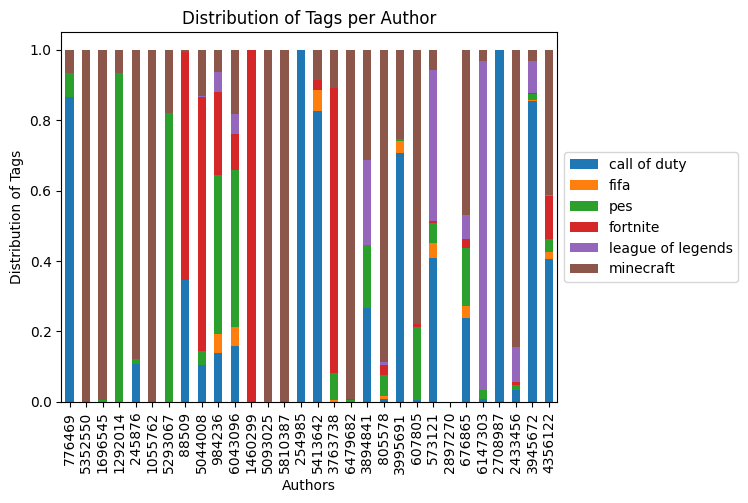

In [12]:

# Define the authors to count
authors = merged_commtags['author'].value_counts().head(30).index.tolist()
print(authors)

# Define colors for each category

# Create a dictionary to store the results
results = {}

# Loop through each category
for tag, color in tqdm(colors.items()):
    # Filter the data to keep only rows with the current category
    df = frames[tag]
    # Count the number of occurrences of each author
    counts = df['author'].value_counts()
    # Keep only the counts for the specified authors
    counts = counts.reindex(authors, fill_value=0)
    # Store the counts in the results dictionary
    results[tag] = counts



# Display the updated dataframe


# Create an empty dataframe to store the results
df = pd.DataFrame(columns=colors.keys(), index=authors)

# Loop through each author
for author in authors:
    # Loop through each category
    for tag in colors.keys():
        # Get the count for the current author and category
        count = results[tag][author]
        # Add the count to the dataframe
        df.at[author, tag] = count

# Display the dataframe
print(df)
# Loop through each row
for index, row in df.iterrows():
    # Divide each value in the row by the sum of the row
    row_sum = row.sum()
    df.loc[index] = row / row_sum

df.plot(kind='bar', stacked=True, legend=False)
plt.xlabel('Authors')
plt.ylabel('Distribution of Tags')
plt.title('Distribution of Tags per Author')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()



[4050565, 140953, 6324417, 2997605, 759373, 1274702, 4205878, 2587193, 3328716, 4869978, 2390693, 4779603, 5735003, 5026345, 2470736, 5103401, 1847888, 3596844, 1598989, 3481159, 4490502, 1834932, 79560, 6408371, 2980557, 1534698, 6156208, 4789589, 5324139, 1366721]


100%|██████████| 6/6 [00:00<00:00, 44.11it/s]

        call of duty fifa pes fortnite league of legends minecraft
4050565            0    0   0        0                 0         0
140953             0    0   0        0                 0         0
6324417            0    0   0        0                 0         0
2997605            0    0   0        0                 0         0
759373             0    0   0        0                 0         0
1274702            0    0   0        0                 0         0
4205878            0    0   0        0                 0         0
2587193            0    0   0        0                 0         1
3328716            0    1   0        0                 0         0
4869978            0    0   0        1                 0         0
2390693            0    0   0        0                 0         0
4779603            0    0   0        0                 0        12
5735003            0    0   0        4                 0         1
5026345            0    0   0        0                 0      

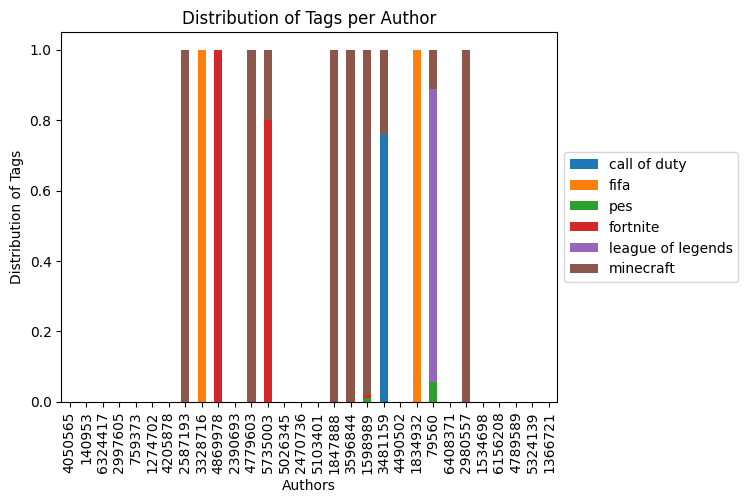

In [15]:
authors = list(merged_commtags['author'].unique())
random.shuffle(authors)
authors = authors[:30]

# Define colors for each category

# Create a dictionary to store the results
results = {}

# Loop through each category
for tag, color in tqdm(colors.items()):
    # Filter the data to keep only rows with the current category
    df = frames[tag]
    # Count the number of occurrences of each author
    counts = df['author'].value_counts()
    # Keep only the counts for the specified authors
    counts = counts.reindex(authors, fill_value=0)
    # Store the counts in the results dictionary
    results[tag] = counts



# Display the updated dataframe


# Create an empty dataframe to store the results
df = pd.DataFrame(columns=colors.keys(), index=authors)

# Loop through each author
for author in authors:
    # Loop through each category
    for tag in colors.keys():
        # Get the count for the current author and category
        count = results[tag][author]
        # Add the count to the dataframe
        df.at[author, tag] = count
df.head()
# Loop through each row
for index, row in df.iterrows():
    # Divide each value in the row by the sum of the row
    row_sum = row.sum()
    df.loc[index] = row / row_sum

df.plot(kind='bar', stacked=True, legend=False)
plt.xlabel('Authors')
plt.ylabel('Distribution of Tags')
plt.title('Distribution of Tags per Author')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()



Filtered data to keep only rows with "call of duty" in tags
Filtered data to keep only rows with "fifa" in tags
Filtered data to keep only rows with "pes" in tags
Filtered data to keep only rows with "fortnite" in tags
Filtered data to keep only rows with "league of legends" in tags
Filtered data to keep only rows with "minecraft" in tags


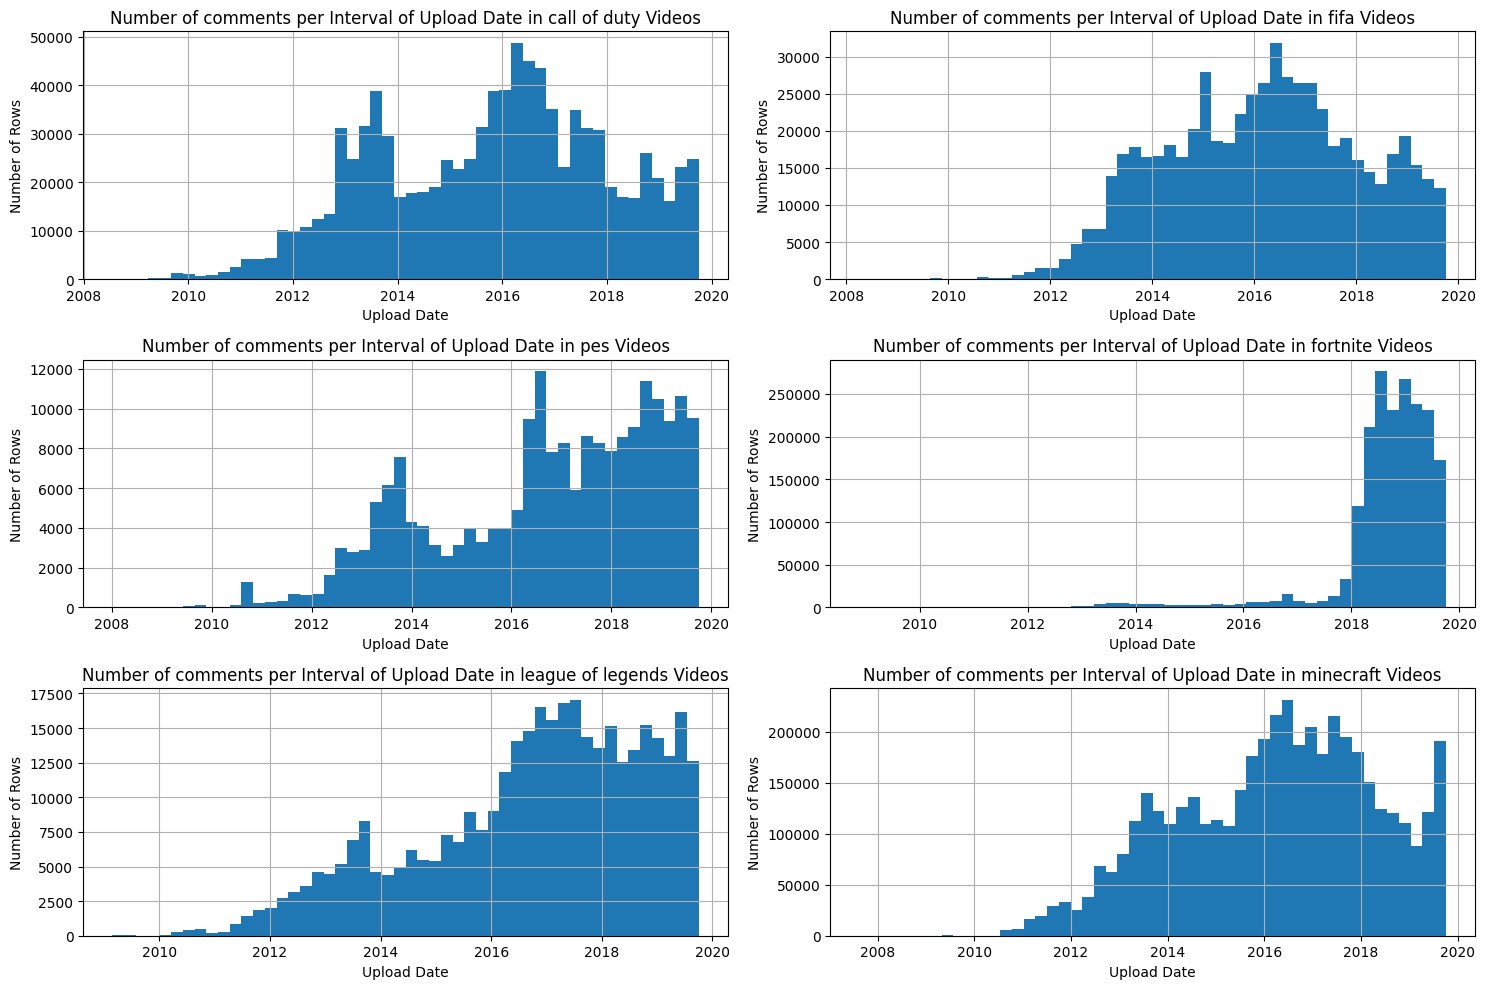

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# Define the tags to plot
tags = ['call of duty', 'fifa', 'pes', 'fortnite', 'league of legends', 'minecraft']

# Loop through each tag and axis
for tag, ax in zip(tags, axes.flatten()):
    # Filter the data and plot the histogram
    a = merged_commtags[merged_commtags['tags'].str.contains(tag, case=False)]
    print(f'Filtered data to keep only rows with "{tag}" in tags')
    a = a.sort_values(by='upload_date')
    a['upload_date'] = pd.to_datetime(a['upload_date'])
    a.hist(column='upload_date', bins=50, figsize=(15, 10), ax=ax)
    ax.set_xlabel('Upload Date')
    ax.set_ylabel('Number of Rows')
    ax.set_title(f'Number of comments per Interval of Upload Date in {tag} Videos')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# Data Exploration using a predefined set of gaming channels.
---

**Goal:** 

The goal of this part is to explore and propose first insights on the sample dataset obtained by filtering channels data from the `time_series` and `channels` dataset.

**Process to Obtain the Dataset:** 

As mentioned above, in this part, we will work using a small sample of the original dataset. This sample was obtained (see `general_data_exploration.ipynb`) by keeping only Gaming YouTubers that we labeled to precise games. \
We chose to restrict ourselves to these following categories ***[MobileGames (e.g Clash of Clans), Gaming News (channels that post videos about updates and news on games), Grand Theft Auto (GTA), League of Legends (LOL), FIFA, Call of Duty (COD), Fortnite, Minecraft]***. From these categories, using internet YouTube forums and YouTube research, we selected for each category at least 5 channels that produce exclusively content of these categories (e.g., the I JACK SPARROW COC channel is dedicated to Clash of Clans).
Finally we filtered the time series tp keep only thos channels and their 'new' tag, and we merged any useful information that could come from the channels dataset in the time series.

---

### Import and Load 

In [1]:
# General lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Stats lib
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats import diagnostic
from scipy import stats
import scipy.fft as sf

# Plot tuning
%matplotlib inline
sns.set()

In [2]:
# Load the data
df_channels = pd.read_csv('data/df_channels_en.tsv.gz', sep='\t', compression='infer')
df_sample_channels = pd.read_parquet('data/df_sample_channels.parquet')
df_sample_timeseries = pd.read_parquet('data/df_sample_timeseries.parquet')

---
### Data Understanding and preparation

#### Channels

In [3]:
# Sample Channels df
print(f'{df_sample_channels.name_cc.nunique()} unique channels')
df_sample_channels.head()

56 unique channels


,name_cc,game_category
0,Klaus Gaming,Mobile Games
1,Past Amazing,Mobile Games
2,I JACK SPARROW COC,Mobile Games
3,Galadon Gaming,Mobile Games
4,Orange Juice Gaming,Mobile Games


This sample channels dataframe contains the 56 Youtubers we selected and their respective gamine category (i.e the game they are playing on the most).

Let's merge it with the general channels dataset to analyse the stats of the channeles we selected.

In [4]:
# Channels df
df_channels.head()

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.087
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.087
3,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0,2.087
4,Sports,2007-05-11,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,48400000,43421,11.0,2.087


In [5]:
# We merge this dataset with our set of selected channels
df_sample_gaming_channels = df_sample_channels.merge(right=df_channels, on='name_cc')
display(df_sample_gaming_channels.head())

# Display the features of our data 
display(df_sample_gaming_channels.columns)

,name_cc,game_category,category_cc,join_date,channel,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Klaus Gaming,Mobile Games,Gaming,2015-11-03,UCN35DM_vPpMz6zPBxeBRWIA,427000,1400,40344.0,3.3215
1,Past Amazing,Mobile Games,Gaming,2016-03-19,UCDwUgJv9ZsPPZq6CajOFLNg,334000,340,49692.0,3.3915
2,I JACK SPARROW COC,Mobile Games,Gaming,2013-11-15,UCWBQKvXstY4yCLQpGvfB1Ug,153981,841,117055.0,4.4920
3,Galadon Gaming,Mobile Games,Gaming,2013-06-12,UC2l8G7UE41Vaby59Dfg6r3w,1760000,2246,7716.0,2.5460
4,Orange Juice Gaming,Mobile Games,Gaming,2015-04-21,UC3S6nIDGJ5OtpC-mbvFA8Ew,1415172,684,9667.0,2.5920


Index(['name_cc', 'game_category', 'category_cc', 'join_date', 'channel',
       'subscribers_cc', 'videos_cc', 'subscriber_rank_sb', 'weights'],
      dtype='object')

First we can drop the general category indicator as now all our channels are sample from the Gaming category. In addition, we can drop `weights` we won't use it in our analysis.

In [6]:
df_sample_gaming_channels = df_sample_gaming_channels.drop(columns=['category_cc', 'weights'])

In [7]:
# Lets look to the format of our new dataset and some stats about its numerical features
df_sample_gaming_channels.info()
df_sample_gaming_channels.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name_cc             56 non-null     object 
 1   game_category       56 non-null     object 
 2   join_date           56 non-null     object 
 3   channel             56 non-null     object 
 4   subscribers_cc      56 non-null     int64  
 5   videos_cc           56 non-null     int64  
 6   subscriber_rank_sb  56 non-null     float64
dtypes: float64(1), int64(2), object(4)
memory usage: 3.5+ KB


,subscribers_cc,videos_cc,subscriber_rank_sb
count,5.600000e+01,56.000000,56.000000
mean,6.514148e+06,4519.035714,13423.482143
std,5.557279e+06,17796.865582,29408.582542
min,1.010000e+05,149.000000,104.000000
25%,1.441293e+06,668.750000,498.000000
50%,5.665000e+06,1942.500000,1380.500000
75%,1.060000e+07,3224.000000,9222.250000
max,2.240000e+07,134606.000000,137394.000000


We observe a high variance among the channels we selected; some appear to be top channels with more than 20 million subscribers, while others are smaller channels with less than a million. This is not a significant issue, as some of the categories we chose could potentially attract a smaller audience due to their high specificity (not everyone might like FIFA).

However, before undertaking similar introductory work with the timeseries dataset, let's change the format of our data to suitable formats (date...) and check for any missing values.


In [8]:
# We can convert name of the channel, game category and channel id to category and the join date to date format
df_sample_gaming_channels[['name_cc', 'game_category', 'channel']] = df_sample_gaming_channels[['name_cc', 'game_category', 'channel']].astype('category')
df_sample_gaming_channels['join_date'] = pd.to_datetime(df_sample_gaming_channels['join_date'])

In [9]:
# Nan check
display(df_sample_gaming_channels.isna().mean())

name_cc               0.0
game_category         0.0
join_date             0.0
channel               0.0
subscribers_cc        0.0
videos_cc             0.0
subscriber_rank_sb    0.0
dtype: float64

#### Timeseries

In [10]:
# Check 
display(df_sample_timeseries.columns)
df_sample_timeseries.head()

Index(['channel', 'category', 'datetime', 'views', 'delta_views', 'subs',
       'delta_subs', 'videos', 'delta_videos', 'activity', 'channel_name',
       'game_category'],
      dtype='object')

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity,channel_name,game_category
1,UCpGdL9Sn3Q5YWUH2DVUW1Ug,Gaming,2016-10-17 00:00:00,6.756017e+09,4.745762e+07,9.224396e+06,73457.375000,3266,11,26,PopularMMOs,Minecraft
2,UCpGdL9Sn3Q5YWUH2DVUW1Ug,Gaming,2016-10-24 00:00:00,6.802824e+09,4.680721e+07,9.284667e+06,60270.875000,3280,14,29,PopularMMOs,Minecraft
3,UCpGdL9Sn3Q5YWUH2DVUW1Ug,Gaming,2016-10-30 23:00:00,6.849790e+09,4.696586e+07,9.333509e+06,48841.865285,3292,12,31,PopularMMOs,Minecraft
4,UCpGdL9Sn3Q5YWUH2DVUW1Ug,Gaming,2016-11-06 23:00:00,6.890571e+09,4.078041e+07,9.375919e+06,42410.384715,3304,12,28,PopularMMOs,Minecraft
5,UCpGdL9Sn3Q5YWUH2DVUW1Ug,Gaming,2016-11-13 23:00:00,6.931459e+09,4.088798e+07,9.427722e+06,51803.244792,3318,14,28,PopularMMOs,Minecraft


In [11]:
# Drop of the common category
df_sample_timeseries = df_sample_timeseries.drop(columns='category')

# Safety check that the timeseries that we have is compatible with the channels we selected
print(f'{df_sample_timeseries.channel_name.nunique()} unique channels')
df_sample_timeseries.channel_name.value_counts().reset_index()

56 unique channels


,index,channel_name
0,PopularMMOs,154
1,TheXclusiveAce,154
2,Sky Does Everything,154
3,Logdotzip,154
4,CaptainSparklez,154
5,DanTDM,154
6,I JACK SPARROW COC,154
7,RaidAway,154
8,The Game Theorists,154
9,Trick2G,154


The dataset indeed contains the same number of channels. Moreover, all the channels are observed during the same intervals.

In [12]:
# Info, stats and Nan check
df_sample_timeseries.info()
df_sample_timeseries.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8624 entries, 1 to 8733
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   channel        8624 non-null   object        
 1   datetime       8624 non-null   datetime64[ns]
 2   views          8624 non-null   float64       
 3   delta_views    8624 non-null   float64       
 4   subs           8624 non-null   float64       
 5   delta_subs     8624 non-null   float64       
 6   videos         8624 non-null   int64         
 7   delta_videos   8624 non-null   int64         
 8   activity       8624 non-null   int64         
 9   channel_name   8624 non-null   object        
 10  game_category  8624 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 808.5+ KB


,views,delta_views,subs,delta_subs,videos,delta_videos,activity
count,8.624000e+03,8.624000e+03,8.624000e+03,8624.000000,8624.000000,8624.000000,8624.000000
mean,1.522490e+09,7.251474e+06,4.622299e+06,22722.931057,2529.666628,6.883001,15.155844
std,2.467927e+09,1.197596e+07,4.668478e+06,50708.463306,6312.789088,15.239512,32.101595
min,1.669288e+04,0.000000e+00,1.795000e+02,0.000000,0.000000,0.000000,0.000000
25%,1.843935e+08,7.092354e+05,8.836051e+05,1245.565104,399.000000,1.000000,4.000000
50%,5.627398e+08,2.395787e+06,2.942865e+06,6413.708333,1610.000000,5.000000,11.000000
75%,1.820255e+09,7.656270e+06,7.743059e+06,22515.031250,2758.250000,7.000000,16.000000
max,1.551577e+10,2.044085e+08,2.241518e+07,891824.451380,55942.000000,285.000000,494.000000


In [13]:
# As we did previously lets convert object to suitable format
df_sample_timeseries[['channel', 'channel_name', 'game_category']] = df_sample_timeseries[['channel', 'channel_name', 'game_category']].astype('category')

In [14]:
# NaN check
display(df_sample_timeseries.isna().mean())

channel          0.0
datetime         0.0
views            0.0
delta_views      0.0
subs             0.0
delta_subs       0.0
videos           0.0
delta_videos     0.0
activity         0.0
channel_name     0.0
game_category    0.0
dtype: float64

---
### Feature exploration

Now that the two datasets are clean and ready to be explored, let's dive into the channels dataset.

#### Channels

In [15]:
df_sample_gaming_channels

,name_cc,game_category,join_date,channel,subscribers_cc,videos_cc,subscriber_rank_sb
0,Klaus Gaming,Mobile Games,2015-11-03,UCN35DM_vPpMz6zPBxeBRWIA,427000,1400,40344.0
1,Past Amazing,Mobile Games,2016-03-19,UCDwUgJv9ZsPPZq6CajOFLNg,334000,340,49692.0
2,I JACK SPARROW COC,Mobile Games,2013-11-15,UCWBQKvXstY4yCLQpGvfB1Ug,153981,841,117055.0
3,Galadon Gaming,Mobile Games,2013-06-12,UC2l8G7UE41Vaby59Dfg6r3w,1760000,2246,7716.0
4,Orange Juice Gaming,Mobile Games,2015-04-21,UC3S6nIDGJ5OtpC-mbvFA8Ew,1415172,684,9667.0
5,IGN,Gaming News,2006-09-19,UCKy1dAqELo0zrOtPkf0eTMw,12400000,134606,333.0
6,The Game Theorists,Gaming News,2009-08-22,UCo_IB5145EVNcf8hw1Kku7w,12000000,515,370.0
7,League of Legends,Gaming News,2009-02-09,UC2t5bjwHdUX4vM2g8TRDq5g,11000000,1004,433.0
8,Fortnite,Gaming News,2014-01-17,UClG8odDC8TS6Zpqk9CGVQiQ,7200000,322,774.0
9,PlayStation,Gaming News,2005-12-16,UC-2Y8dQb0S6DtpxNgAKoJKA,8960000,11582,604.0


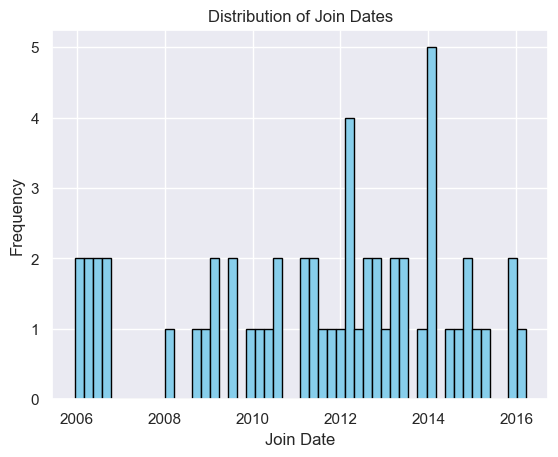

In [16]:
# First lets look at the join dates distribution
df_sample_gaming_channels['join_date'].hist(bins=50, edgecolor='black', color='skyblue')  # Adjust the number of bins as needed
plt.title('Distribution of Join Dates')
plt.xlabel('Join Date')
plt.ylabel('Frequency')
plt.show()

Using this plot and the dataframe we note that some channels were created before 2010 and most of the others after 2012, looking at the table we note that these old channels seems also the most famous one.

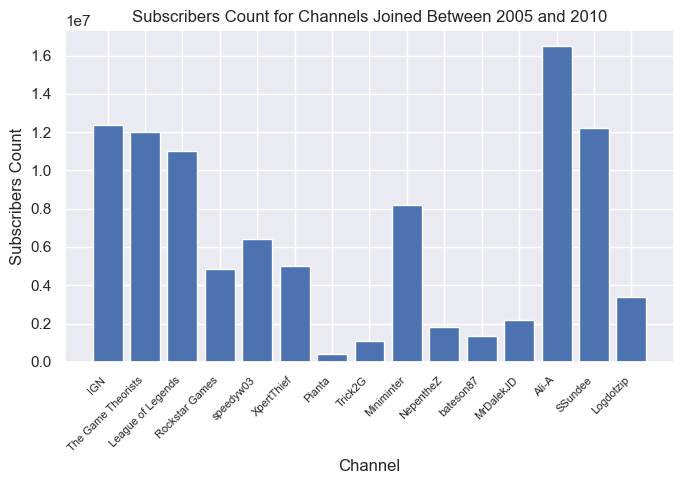

In [17]:
# Display Sub for channels join before 2010
channels_before_2010 = df_sample_gaming_channels[(df_sample_gaming_channels['join_date'].dt.year > 2005) & (df_sample_gaming_channels['join_date'].dt.year < 2010)]

# Plot subscribers count
plt.figure(figsize=(7, 5))
plt.bar(channels_before_2010['name_cc'], channels_before_2010['subscribers_cc'])
plt.title('Subscribers Count for Channels Joined Between 2005 and 2010')
plt.xlabel('Channel')
plt.ylabel('Subscribers Count')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

Looking at the oldest channels, finally, some are famous, but others are not at all. Starting a long time ago seems to not imply fame.

Lets analyse the differences between the game category in terms of subscriber count, videos count and subscriber rank. 

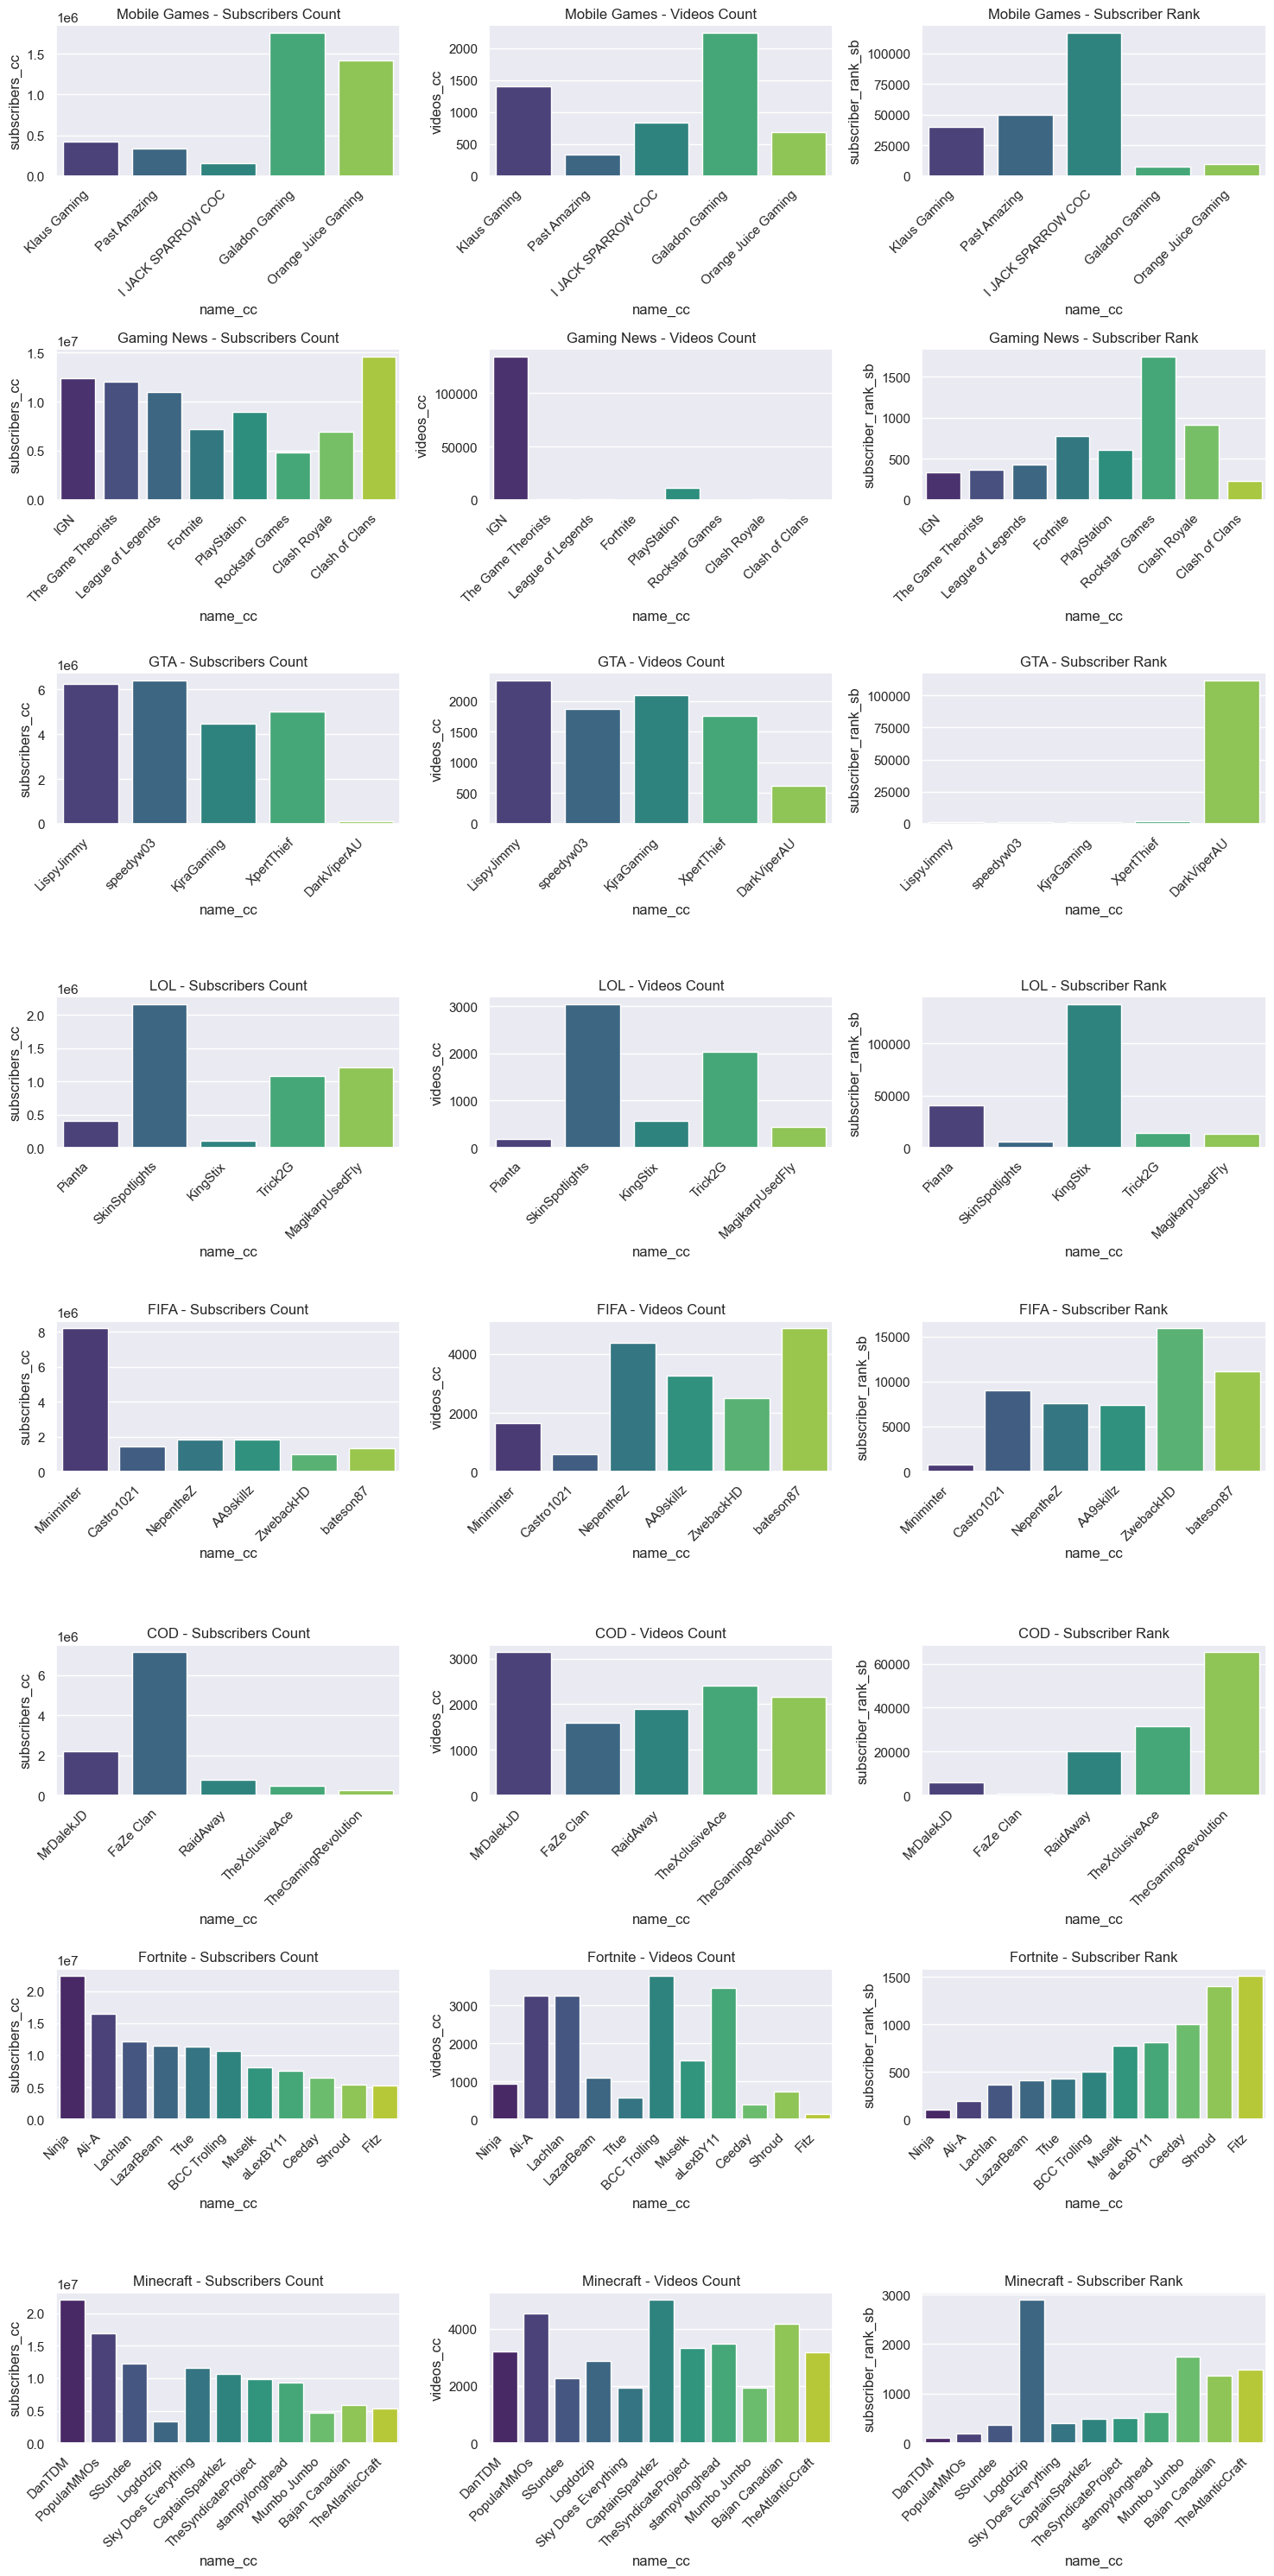

In [18]:
# Display a multi plot of the data distribution per channel per categories
rows = 8  
cols = 3  
fig, axes = plt.subplots(rows, cols, figsize=(15, 30))
axes = axes.flatten()

for i, game_category in enumerate(df_sample_gaming_channels['game_category'].unique()):
    subset = df_sample_gaming_channels[df_sample_gaming_channels['game_category'] == game_category]
    # Simple bar plot
    sns.barplot(x=subset.name_cc.astype(str), y='subscribers_cc', data=subset, ax=axes[i * cols], palette='viridis')
    axes[i * cols].set_title(f'{game_category} - Subscribers Count')

    sns.barplot(x=subset.name_cc.astype(str), y='videos_cc', data=subset, ax=axes[i * cols + 1], palette='viridis')
    axes[i * cols + 1].set_title(f'{game_category} - Videos Count')

    sns.barplot(x=subset.name_cc.astype(str), y='subscriber_rank_sb', data=subset, ax=axes[i * cols + 2], palette='viridis')
    axes[i * cols + 2].set_title(f'{game_category} - Subscriber Rank')

    # readability settings
    for ax in axes[i * cols:i * cols + 3]:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


**Comments:** 

We can observe that, in terms of subscribers, Minecraft, Fortnite, and Gaming News channels are above the others, reaching the 1e7 (10 million) mark. Within each category, the YouTubers' fame also varies significantly; some YouTubers are extremely popular compared to others in the same category. For example, in the FIFA category, Miniminter is much more famous than the others, and the same holds true for SkinSpotlights in League of Legends (LOL).

It's worth noting that the most famous channels are not necessarily the ones with the highest number of videos. Moreover, in terms of the general ranking, every category seems to contain channels that are among the top in the YouTube subscriber ranking.

Additionally, in Grand Theft Auto (GTA), LOL, and FIFA, there is a notable difference between some of the YouTubers

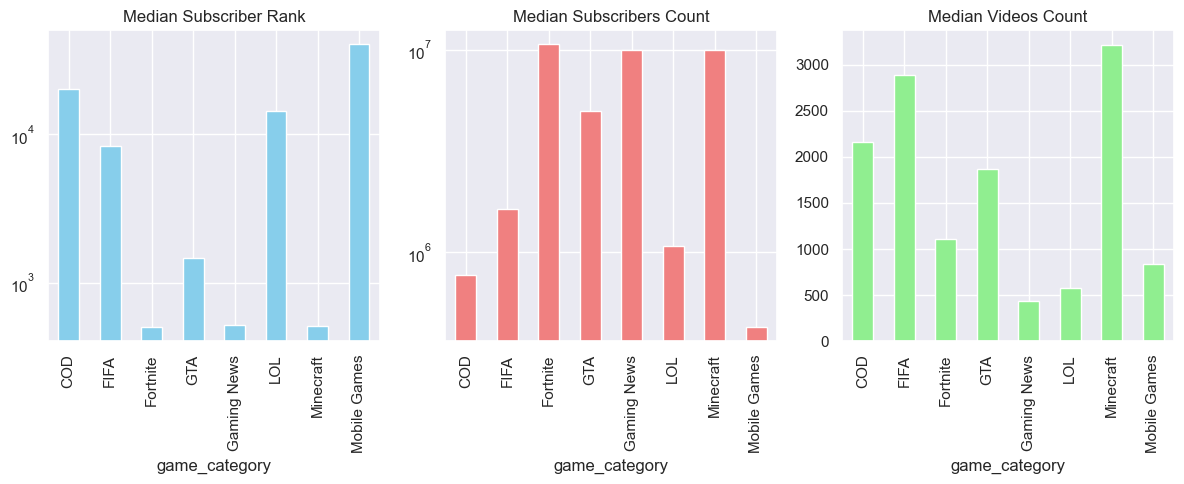

In [19]:
# Let's visualize the same graph but this time by game category taking the median of the values in each category (outlier robustness)
grouped = df_sample_gaming_channels.groupby('game_category')[['subscribers_cc', 'videos_cc', 'subscriber_rank_sb']].median()

# Subplots settings
rows = 1  
cols = 3  
fig, axes = plt.subplots(rows, cols, figsize=(12, 5)) 
axes = axes.flatten()

# Bar plots for each metric
grouped['subscriber_rank_sb'].plot(kind='bar', ax=axes[0], color='skyblue') 
axes[0].set_title('Median Subscriber Rank')
axes[0].set_yscale('log')

grouped['subscribers_cc'].plot(kind='bar', ax=axes[1], color='lightcoral')  
axes[1].set_title('Median Subscribers Count')
axes[1].set_yscale('log')

grouped['videos_cc'].plot(kind='bar', ax=axes[2], color='lightgreen')  
axes[2].set_title('Median Videos Count')

plt.tight_layout()
plt.show()


Looking at the median distribution, we confirm that Fortnite and Minecraft contains channels with lowest rank and then the highest subscriber count. See also the high number of FIFA and Minecraft videos in comparison with LOL or Fortnite.

Note that the youtubers we selected are only a sample of these categories but as we selected the top youtubers of these categories they should be representative of each games.

#### Timeseries

In [20]:
df_sample_timeseries.head()

,channel,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity,channel_name,game_category
1,UCpGdL9Sn3Q5YWUH2DVUW1Ug,2016-10-17 00:00:00,6.756017e+09,4.745762e+07,9.224396e+06,73457.375000,3266,11,26,PopularMMOs,Minecraft
2,UCpGdL9Sn3Q5YWUH2DVUW1Ug,2016-10-24 00:00:00,6.802824e+09,4.680721e+07,9.284667e+06,60270.875000,3280,14,29,PopularMMOs,Minecraft
3,UCpGdL9Sn3Q5YWUH2DVUW1Ug,2016-10-30 23:00:00,6.849790e+09,4.696586e+07,9.333509e+06,48841.865285,3292,12,31,PopularMMOs,Minecraft
4,UCpGdL9Sn3Q5YWUH2DVUW1Ug,2016-11-06 23:00:00,6.890571e+09,4.078041e+07,9.375919e+06,42410.384715,3304,12,28,PopularMMOs,Minecraft
5,UCpGdL9Sn3Q5YWUH2DVUW1Ug,2016-11-13 23:00:00,6.931459e+09,4.088798e+07,9.427722e+06,51803.244792,3318,14,28,PopularMMOs,Minecraft


In [21]:
categorized_sample_df = df_sample_timeseries.groupby(['game_category', 'datetime']).mean().reset_index().groupby('game_category')

game_categories = list(categorized_sample_df.groups.keys())
N = len(game_categories)
print(f'Videos of {N} different games categories')

Videos of 8 different games categories


##### Helpers

In [46]:
def timeseries_correlations(df, feature, verbose=False):
    """Method to compute the timeseries categories correlations

    Args:
        df: the categories dataframe
        feature: the observed feature
        verbose (bool, optional): whether you want to print the results

    Returns:
        corrs: the correlations numpy array
    """
    corrs = np.zeros(shape=(N,N))
    for i, (category_a, category_a_df) in enumerate(df):
        for j, (category_b, category_b_df) in enumerate(df):   
            corrs[i,j] = stats.pearsonr(category_a_df[feature], category_b_df[feature])[0]
            if verbose:
                print('-'*30)
                print(f"{category_a}-{category_b}")
                print(f"Delta subs Corr. : {corrs[i,j]}")
    return corrs

def fourier_plot(df, feature):
    """Helper method to generate the fourier and timeseries analysis plot

    Args:
        df: the categories dataframe
        feature: the observed feature
    """
    fig, axs = plt.subplots(N, 2, figsize=(15, 3 * N), sharex='col')
    fig.suptitle(f"{feature} timeseries and its FT")

    # Create a color palette for each category
    palette = sns.color_palette("husl", n_colors=N)

    for i, (category, category_df) in enumerate(df):
        # Timeseries Plot
        sns.lineplot(category_df, x='datetime', y=feature, ax=axs[i, 0], color=palette[i])
        #sns.regplot(category_df, x='datetime', y=feature, ax=axs[i, 0], scatter=False, color='red')
        axs[i, 0].set_title(f'Timeseries - {category}')
        axs[i, 0].set_xlabel('Datetime')
        axs[i, 0].set_ylabel(feature)

        # Computing Fourier Transform
        freqs, fft_values = ft(category_df, feature)

        # FT Plot
        sns.barplot(x=freqs, y=fft_values, ax=axs[i, 1], color=palette[i]) 
        axs[i, 1].set_title(f'Fourier Transform - {category}')
        axs[i, 1].set_xlabel('Frequency')
        axs[i, 1].set_ylabel('Amplitude')

        # Adjust x-axis ticks for the Fourier Transform plot
        axs[i, 1].set_xticks(axs[i, 1].get_xticks()[::5])
        axs[i, 1].set_xticklabels(axs[i, 1].get_xticks())


    plt.tight_layout(rect=[0, 0, 1, 0.98])  # Adjust layout to prevent clipping of suptitle
    plt.show()

def corr_plot(df, feature, labels):
    """Helper method to generate the heatmap of the correlations

    Args:
        df: the categories dataframe
        feature: the observed feature
        labels: the categories labels
    """
    # Create a heatmap with Seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(timeseries_correlations(df, feature), 
                annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': f'{feature} Correlation'})

    plt.title(f'Categories {feature} Correlation')

    # Set x and y labels
    plt.xticks(ticks=[i + 0.5 for i in range(len(labels))], labels=labels, rotation=90, ha='right')
    plt.yticks(ticks=[i + 0.5 for i in range(len(labels))], labels=labels, rotation=0)

    plt.show()

def ft(df, metric):
    N = df.shape[0]

    # Fourier transform
    fft = np.abs(sf.rfft(df[metric].to_numpy()))/N
    freqs = sf.rfftfreq(N, d=0.1)[::-1]

    return freqs, fft


##### Views

We first have a look at the views. We will use the `delta_views` metrics since it shows categories performances local movements more accurately. 

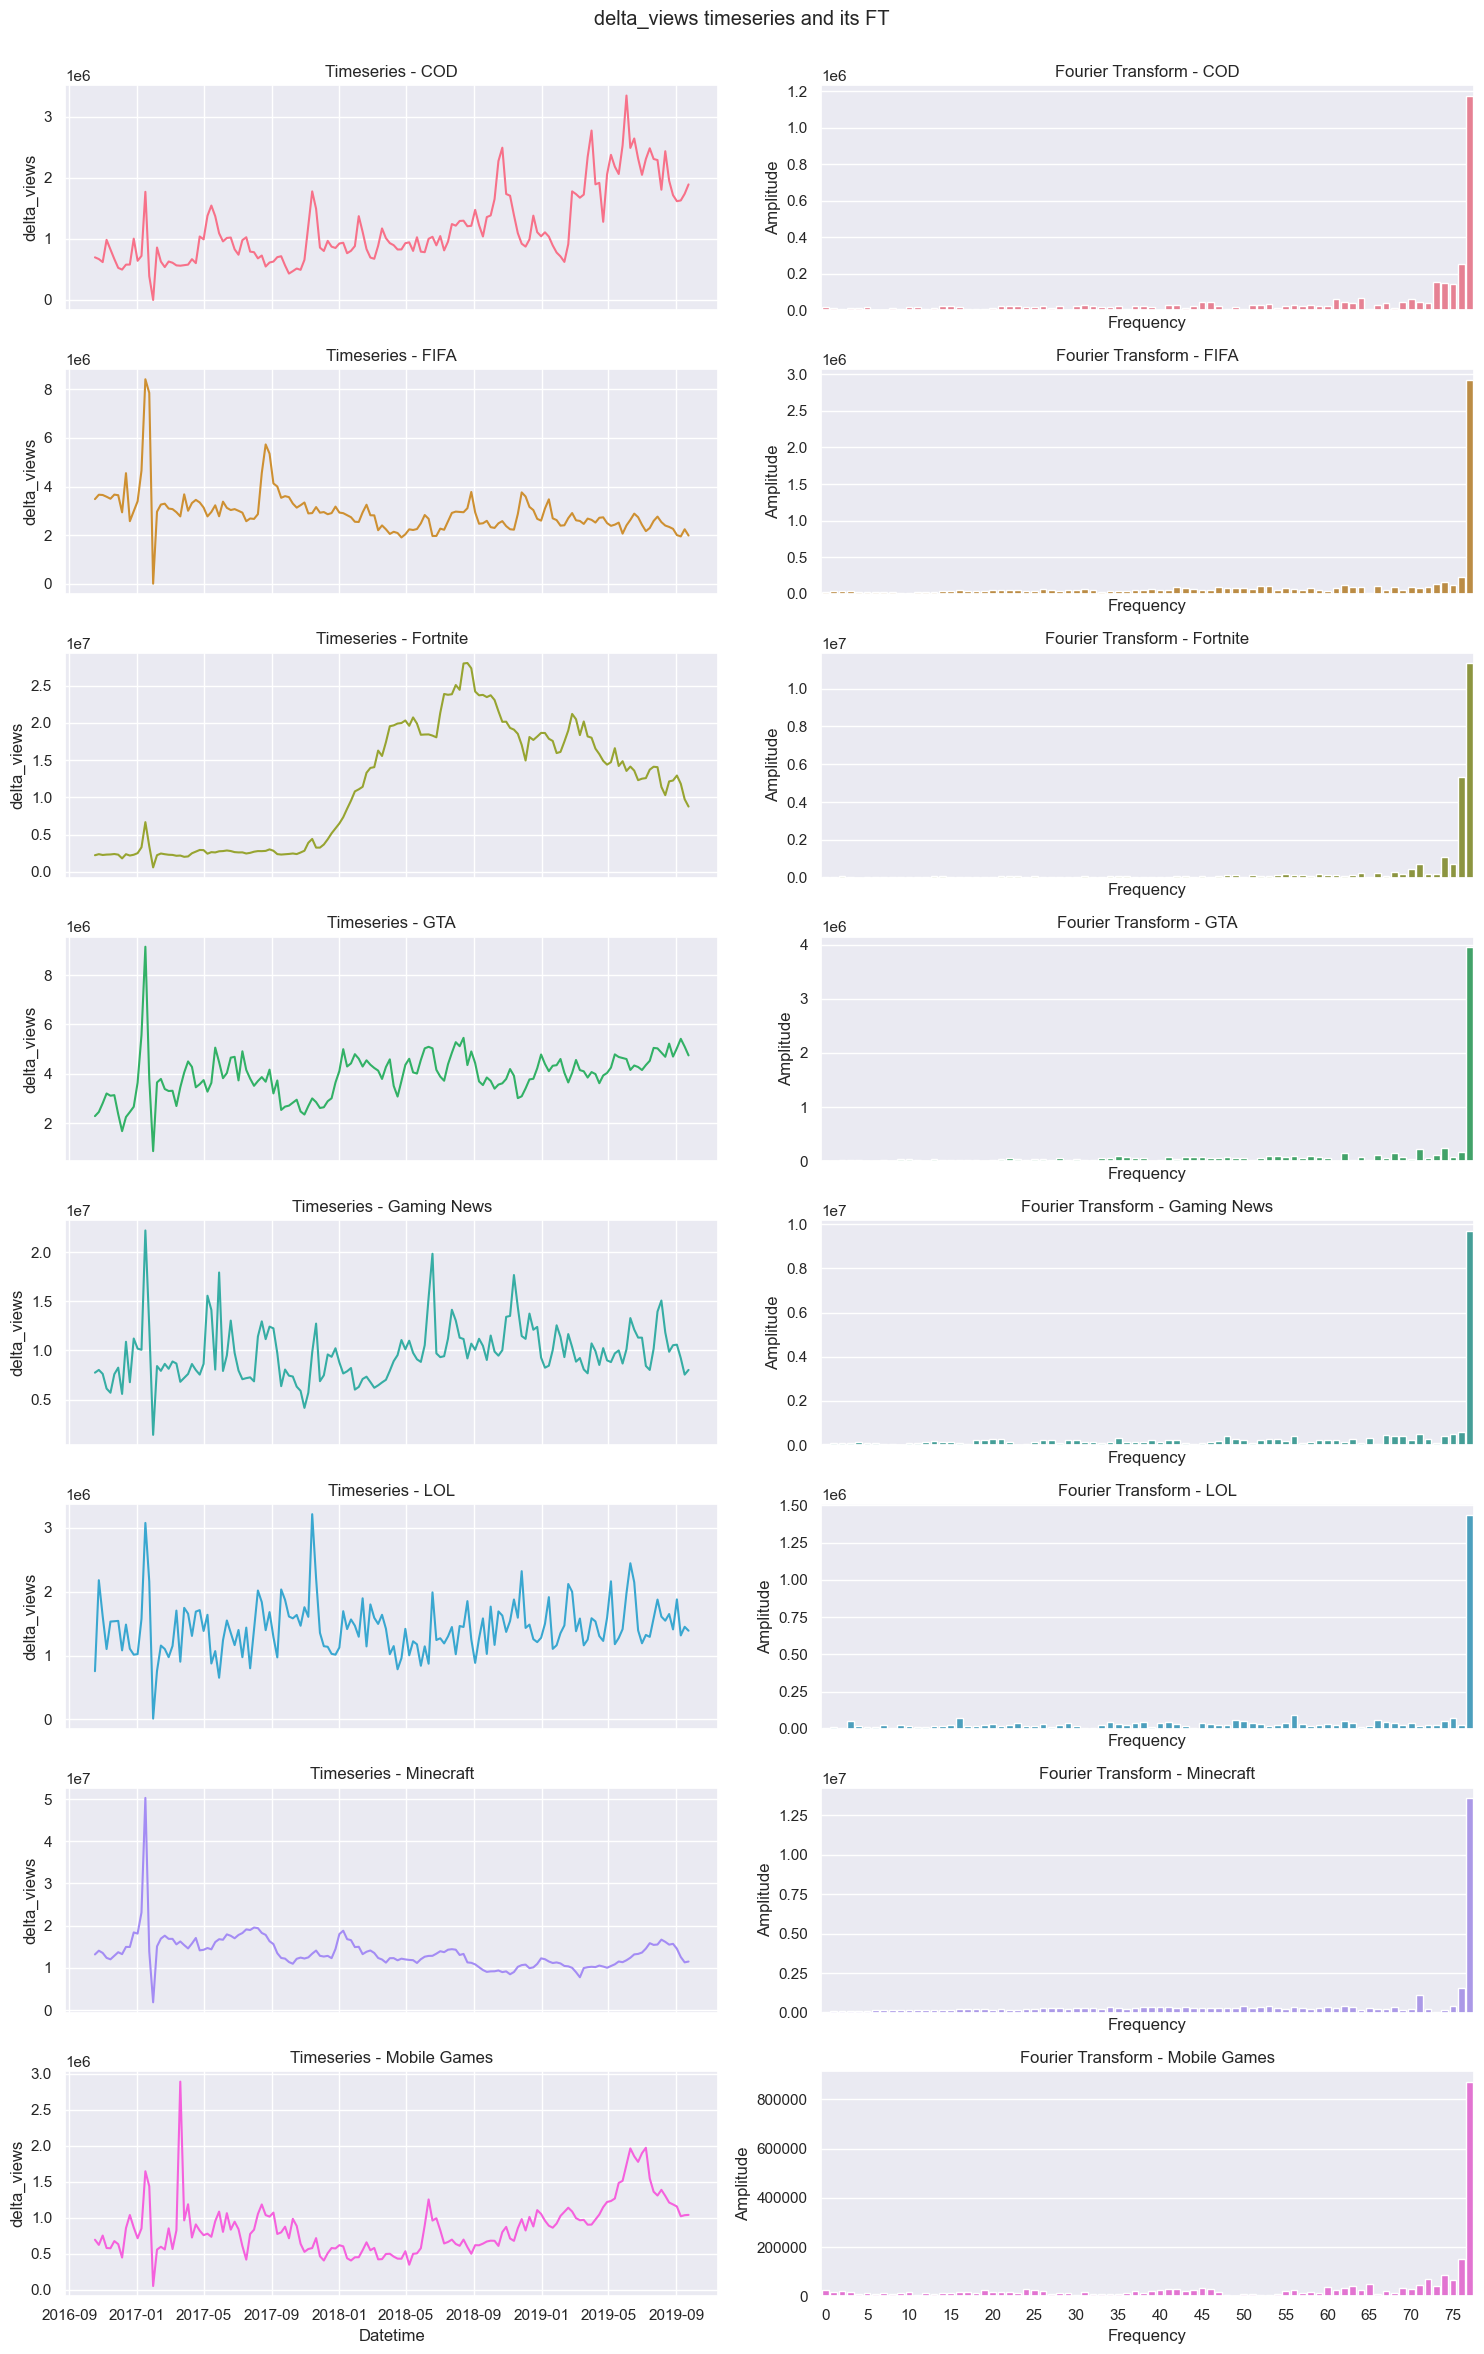

In [51]:
metric = 'delta_views'
fourier_plot(categorized_sample_df, metric)

Here we used a different y-axis for each game community since otherwise, **Fortnite's big spike would crush all other graphs.**

Some notes:
- Temporality analysis seems to be useless, except for small spikes in FIFA (might be about games release every year), there seems to be no real periods.
- We clearly see the explosion of the fortnite channels views at the time of after its launch.
- Some games seems to be very stable in views across all the time period (e.g. Minecraft, FIFA, GTA) - except for some spikes which seems to be events or major updates.
- In the P3, we'll go deeper and look at the sense of the impressive spikes (as stated above) for certain categories

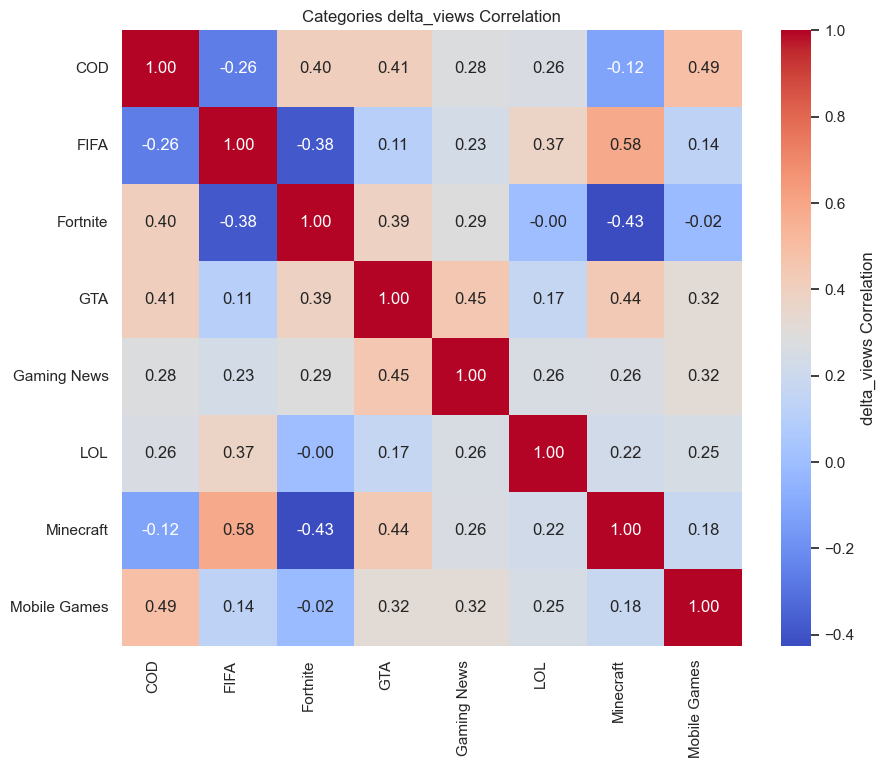

In [52]:
corr_plot(categorized_sample_df, metric, game_categories)

There are some interesting `delta_views` correlations here:
- *Minecraft-Fortnite*: -0.43, can think that Fortnite is stealing some of Minecraft's community (or vice-versa)
- *FIFA-Fortnite*: -0,38, again; can think that Fortnite is stealing some of FIFA's community (or vice-versa)
- *LOL-Fortnite*: 0, theses games seems to be evolving totally independantly; we should see it in the community network
- *Minecraft-FIFA*: +0.58, might think that FIFA's community is close to (or overlaps) Minecraft's one.
- *Mobile Games-COD*: +0.49, again; might think that MG's community is close to (or overlaps) COD's one.

##### Subscriptions

We then have a look at the subs. We will use the `delta_subs` metrics since it shows categories performances local movements more accurately. 

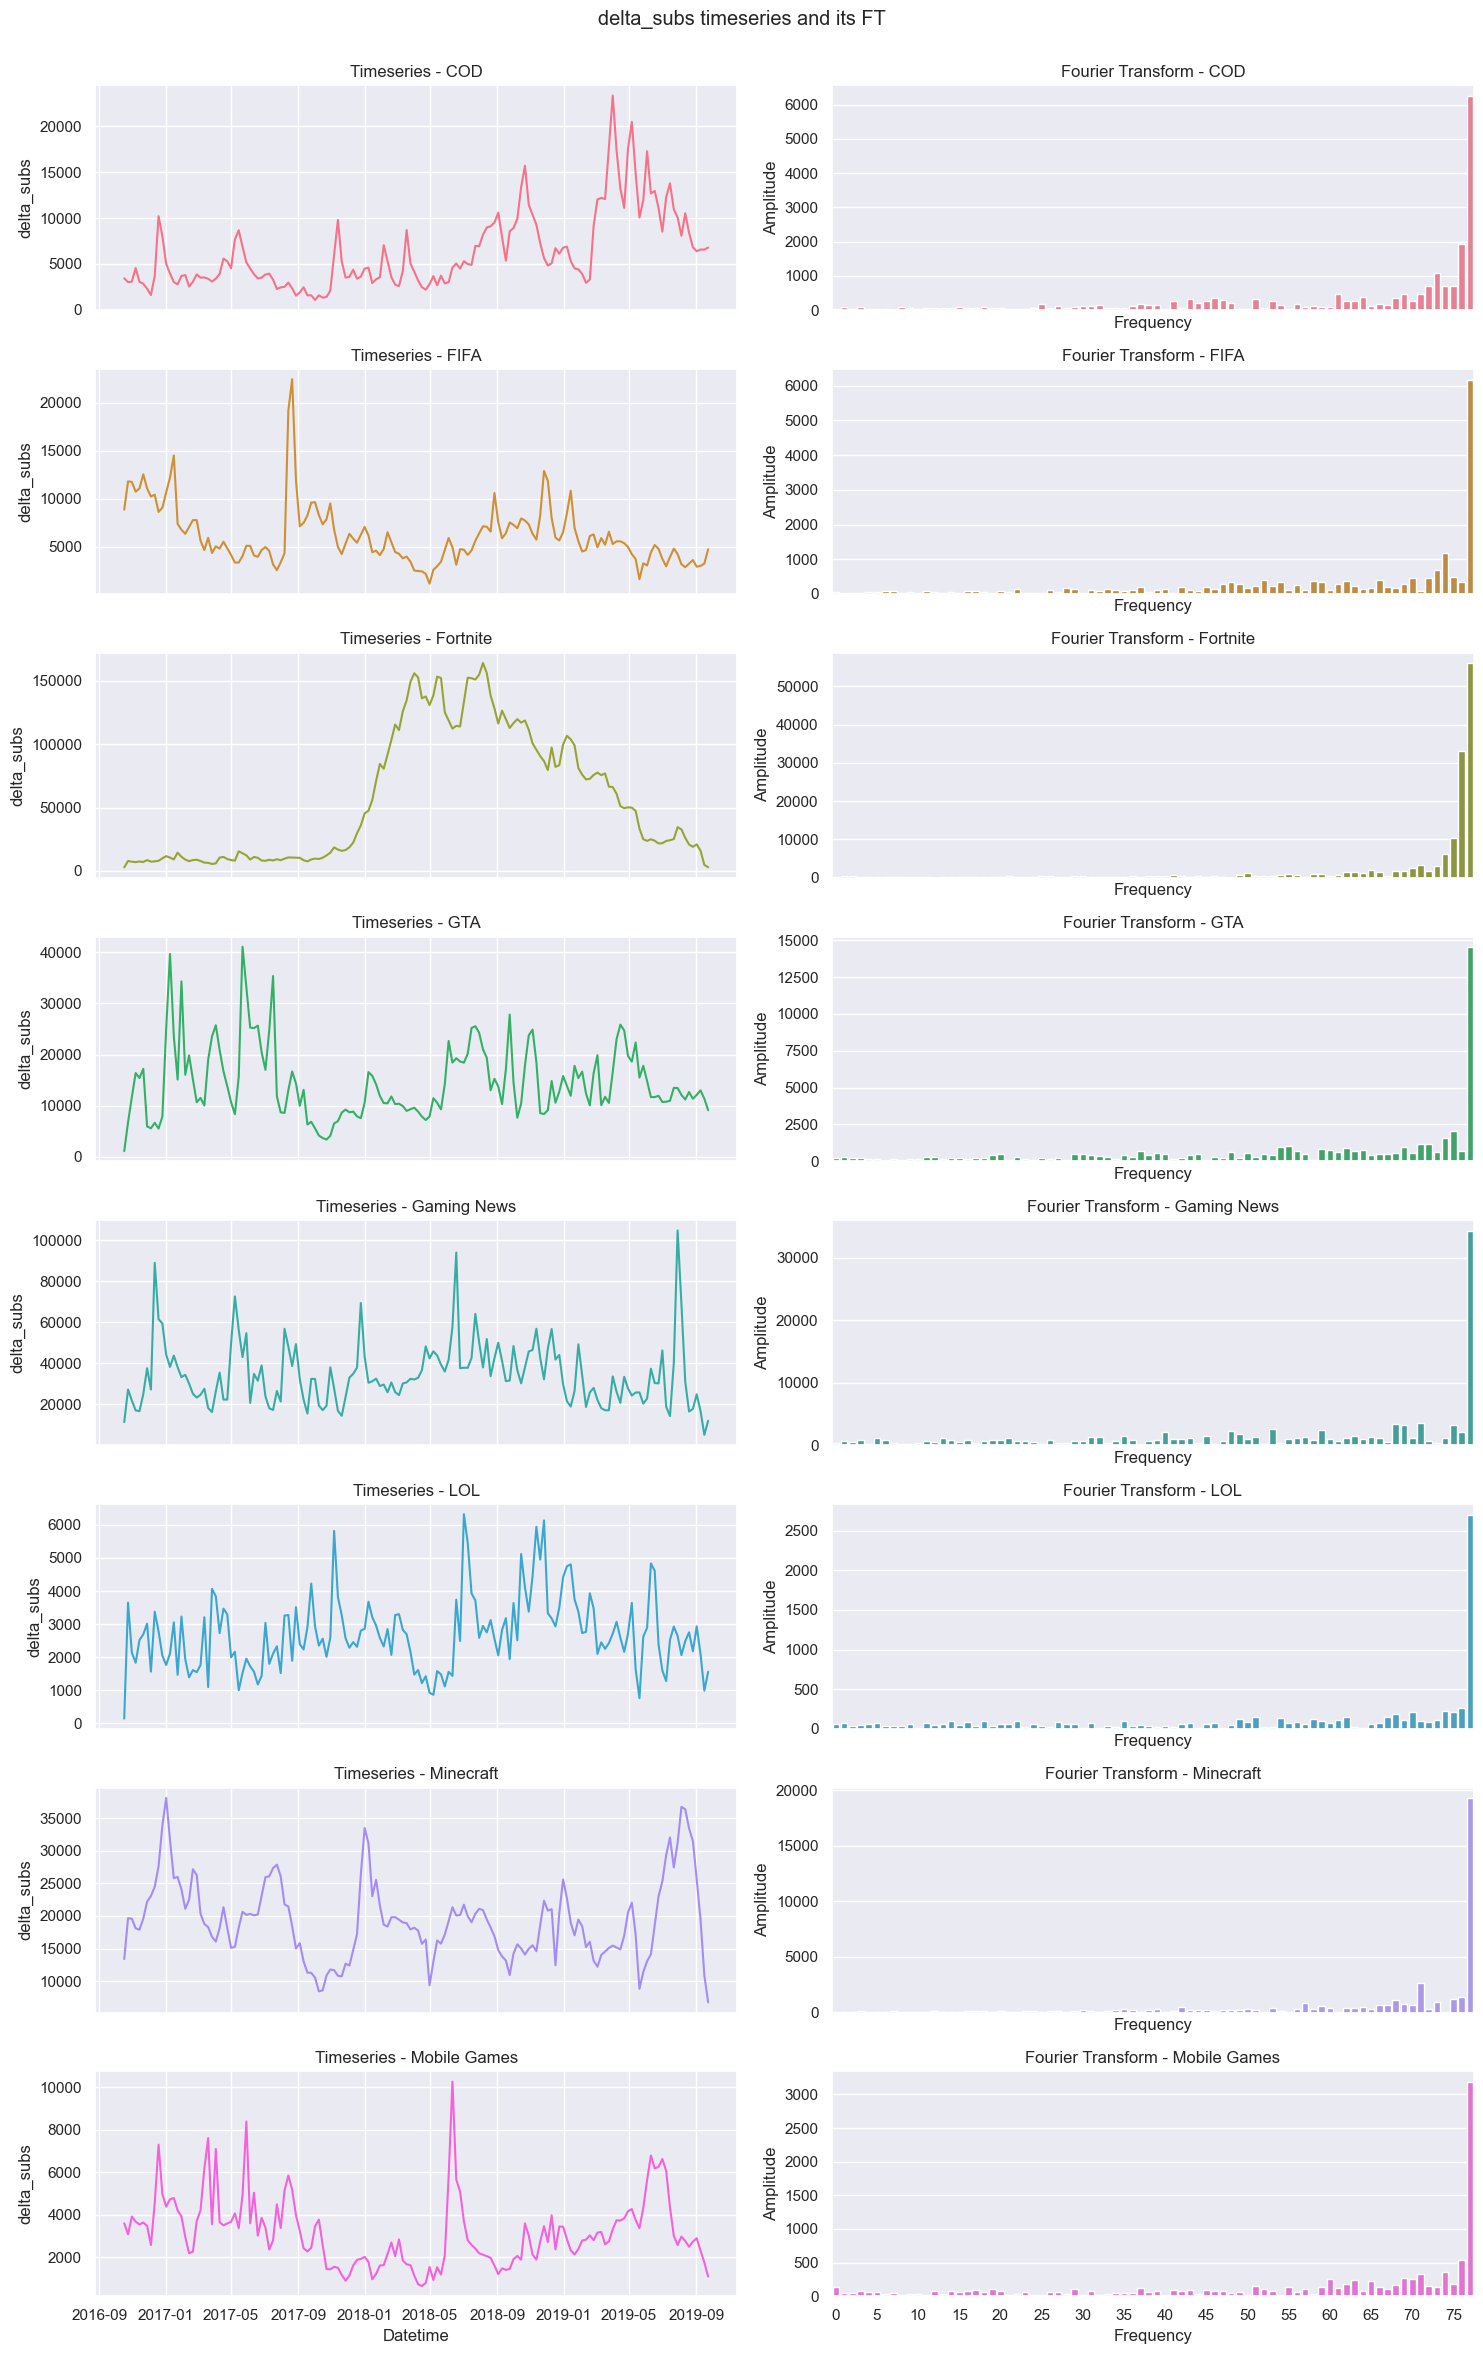

In [53]:
metric = 'delta_subs'
fourier_plot(categorized_sample_df, metric)

The conclusions here are quite the same as for the `delta_views`. We just observe that `delta_subs` seems to be a more volatile metric.

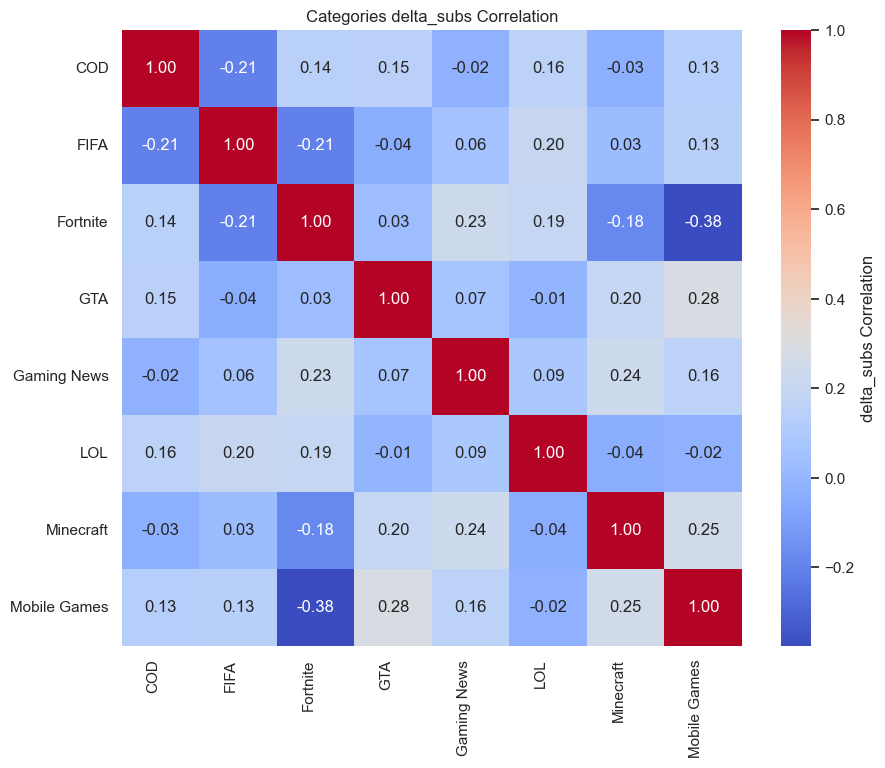

In [54]:
corr_plot(categorized_sample_df, metric, game_categories)

Some notes:
- We have a lot more uncorrelated categories when looking at the `delta_subs`
- The `delta_views` highly negatively correlated categories are still negatively correlated (e.g *Minecraft-Fortnite*,...)
- Some new notable correlations appears (e.g. *Fortnite-MG*=-0.38,...)
- We have no quite high positive correlations!

**Comments:** 

Unfortunately, the Fourier Analysis has no leaded to interesting insights. However, when looking at the timeseries, you see that some games are really constant in their `delta_views` or `delta_subs` (e.g. Minecraft, FIFA...), but others are enountering some high performances spikes (e.g. Fortnite, COD,..). 

We can observe that some games communities are closely related - wether it seems close (high positive correlation) or possibly stealing users one to another (high negative correlation). Fortnite in example, seems to be a community built on others' users moving - it has really important negative correlations. In a first look, `delta_views` seems to be a bit more interesting to analyze but we have to keep in mind the interesting relatively high negative correlations of the `delta_subs`.